# 条件付き確率分布, 尤度, 推定, 記述統計

* 黒木玄
* 2022-05-22

$
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
\newcommand\T[1]{T_{(#1)}}
\newcommand\bk{\bar\kappa}
\newcommand\X{{\mathscr X}}
$

このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートに書いてある式を文字通りにそのまま読んで正しいと思ってしまうとひどい目に会う可能性が高い. しかし, 数が使われている文献には大抵の場合に文字通りに読むと間違っている式や主張が書いてあるので, 内容を理解した上で訂正しながら読んで利用しなければいけない. 実践的に数学を使う状況では他人が書いた式をそのまま信じていけない.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#条件付き確率分布" data-toc-modified-id="条件付き確率分布-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>条件付き確率分布</a></span><ul class="toc-item"><li><span><a href="#離散確率分布の条件付き確率分布" data-toc-modified-id="離散確率分布の条件付き確率分布-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>離散確率分布の条件付き確率分布</a></span></li><li><span><a href="#条件付き期待値の基本性質(離散分布版)" data-toc-modified-id="条件付き期待値の基本性質(離散分布版)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>条件付き期待値の基本性質(離散分布版)</a></span></li><li><span><a href="#離散分布の条件付き確率分布の簡単な例" data-toc-modified-id="離散分布の条件付き確率分布の簡単な例-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>離散分布の条件付き確率分布の簡単な例</a></span></li><li><span><a href="#問題:-離散分布の条件付き確率分布として二項分布が得られること" data-toc-modified-id="問題:-離散分布の条件付き確率分布として二項分布が得られること-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>問題: 離散分布の条件付き確率分布として二項分布が得られること</a></span></li><li><span><a href="#離散分布の場合のBayesの定理" data-toc-modified-id="離散分布の場合のBayesの定理-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>離散分布の場合のBayesの定理</a></span></li><li><span><a href="#2×2の分割表での条件付き確率分布(偽陽性率,-偽陰性率)" data-toc-modified-id="2×2の分割表での条件付き確率分布(偽陽性率,-偽陰性率)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>2×2の分割表での条件付き確率分布(偽陽性率, 偽陰性率)</a></span></li><li><span><a href="#必修の易しい計算問題:-有病率によって偽陽性率と偽陰性率がどのように変化するか" data-toc-modified-id="必修の易しい計算問題:-有病率によって偽陽性率と偽陰性率がどのように変化するか-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>必修の易しい計算問題: 有病率によって偽陽性率と偽陰性率がどのように変化するか</a></span></li><li><span><a href="#有病率によって偽陽性率と偽陰性率がどのように変化するかの視覚化" data-toc-modified-id="有病率によって偽陽性率と偽陰性率がどのように変化するかの視覚化-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>有病率によって偽陽性率と偽陰性率がどのように変化するかの視覚化</a></span></li><li><span><a href="#おまけの問題:-モンティ・ホール問題-(Monty-Hall-problem)" data-toc-modified-id="おまけの問題:-モンティ・ホール問題-(Monty-Hall-problem)-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>おまけの問題: モンティ・ホール問題 (Monty Hall problem)</a></span></li><li><span><a href="#連続確率分布の条件付き確率分布" data-toc-modified-id="連続確率分布の条件付き確率分布-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>連続確率分布の条件付き確率分布</a></span></li><li><span><a href="#条件付き期待値の基本性質(連続分布版)" data-toc-modified-id="条件付き期待値の基本性質(連続分布版)-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>条件付き期待値の基本性質(連続分布版)</a></span></li><li><span><a href="#連続分布版のBayesの定理" data-toc-modified-id="連続分布版のBayesの定理-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>連続分布版のBayesの定理</a></span></li><li><span><a href="#問題:-連続分布の条件付き確率分布の例-(分散が固定された正規分布モデルのBayes統計)" data-toc-modified-id="問題:-連続分布の条件付き確率分布の例-(分散が固定された正規分布モデルのBayes統計)-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>問題: 連続分布の条件付き確率分布の例 (分散が固定された正規分布モデルのBayes統計)</a></span></li><li><span><a href="#分散が固定された正規分布モデルのBayes統計の事後分布の視覚化" data-toc-modified-id="分散が固定された正規分布モデルのBayes統計の事後分布の視覚化-1.14"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>分散が固定された正規分布モデルのBayes統計の事後分布の視覚化</a></span></li><li><span><a href="#問題:-2変量の正規分布とその条件付き確率分布の例" data-toc-modified-id="問題:-2変量の正規分布とその条件付き確率分布の例-1.15"><span class="toc-item-num">1.15&nbsp;&nbsp;</span>問題: 2変量の正規分布とその条件付き確率分布の例</a></span></li><li><span><a href="#2変量の正規分布とその条件付き確率分布の例の視覚化" data-toc-modified-id="2変量の正規分布とその条件付き確率分布の例の視覚化-1.16"><span class="toc-item-num">1.16&nbsp;&nbsp;</span>2変量の正規分布とその条件付き確率分布の例の視覚化</a></span></li></ul></li><li><span><a href="#2×2の分割表の分布" data-toc-modified-id="2×2の分割表の分布-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2×2の分割表の分布</a></span><ul class="toc-item"><li><span><a href="#4つのPoisson分布の積" data-toc-modified-id="4つのPoisson分布の積-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>4つのPoisson分布の積</a></span></li><li><span><a href="#四項分布" data-toc-modified-id="四項分布-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>四項分布</a></span></li><li><span><a href="#2つの二項分布の積" data-toc-modified-id="2つの二項分布の積-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2つの二項分布の積</a></span></li><li><span><a href="#Fisherの非心超幾何分布" data-toc-modified-id="Fisherの非心超幾何分布-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Fisherの非心超幾何分布</a></span></li><li><span><a href="#Fisherの非心超幾何分布の正規分布近似の視覚化" data-toc-modified-id="Fisherの非心超幾何分布の正規分布近似の視覚化-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Fisherの非心超幾何分布の正規分布近似の視覚化</a></span></li><li><span><a href="#四項分布は4つのPoisson分布の積の条件付き確率分布" data-toc-modified-id="四項分布は4つのPoisson分布の積の条件付き確率分布-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>四項分布は4つのPoisson分布の積の条件付き確率分布</a></span></li><li><span><a href="#2つの二項分布の積は四項分布は4つの条件付き確率分布" data-toc-modified-id="2つの二項分布の積は四項分布は4つの条件付き確率分布-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>2つの二項分布の積は四項分布は4つの条件付き確率分布</a></span></li><li><span><a href="#Fisherの非心超幾何分布は2つの二項分布の積の条件付き確率分布" data-toc-modified-id="Fisherの非心超幾何分布は2つの二項分布の積の条件付き確率分布-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Fisherの非心超幾何分布は2つの二項分布の積の条件付き確率分布</a></span></li><li><span><a href="#独立性条件" data-toc-modified-id="独立性条件-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>独立性条件</a></span></li><li><span><a href="#Pearsonのχ²統計量" data-toc-modified-id="Pearsonのχ²統計量-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Pearsonのχ²統計量</a></span></li></ul></li><li><span><a href="#尤度-(ゆうど)と推定" data-toc-modified-id="尤度-(ゆうど)と推定-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>尤度 (ゆうど)と推定</a></span><ul class="toc-item"><li><span><a href="#尤度に関するまとめ" data-toc-modified-id="尤度に関するまとめ-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>尤度に関するまとめ</a></span></li><li><span><a href="#尤度函数と尤度の定義と諸注意" data-toc-modified-id="尤度函数と尤度の定義と諸注意-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>尤度函数と尤度の定義と諸注意</a></span></li><li><span><a href="#例:-Bernoulli試行の尤度函数と最尤法" data-toc-modified-id="例:-Bernoulli試行の尤度函数と最尤法-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>例: Bernoulli試行の尤度函数と最尤法</a></span></li><li><span><a href="#Bernoulli試行モデルの尤度函数の視覚化" data-toc-modified-id="Bernoulli試行モデルの尤度函数の視覚化-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Bernoulli試行モデルの尤度函数の視覚化</a></span></li><li><span><a href="#問題:-尤度が高くても全然もっともらしくない例(オーバーフィッティングの例)" data-toc-modified-id="問題:-尤度が高くても全然もっともらしくない例(オーバーフィッティングの例)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>問題: 尤度が高くても全然もっともらしくない例(オーバーフィッティングの例)</a></span></li><li><span><a href="#問題:-正規分布の標本分布モデルの尤度函数と最尤法" data-toc-modified-id="問題:-正規分布の標本分布モデルの尤度函数と最尤法-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>問題: 正規分布の標本分布モデルの尤度函数と最尤法</a></span></li><li><span><a href="#正規分布の標本分布モデルの尤度函数の視覚化" data-toc-modified-id="正規分布の標本分布モデルの尤度函数の視覚化-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>正規分布の標本分布モデルの尤度函数の視覚化</a></span></li><li><span><a href="#問題:-最小二乗法がある種の正規分布モデルの最尤法に一致すること" data-toc-modified-id="問題:-最小二乗法がある種の正規分布モデルの最尤法に一致すること-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>問題: 最小二乗法がある種の正規分布モデルの最尤法に一致すること</a></span></li><li><span><a href="#最尤法の観点から見た十分統計量" data-toc-modified-id="最尤法の観点から見た十分統計量-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>最尤法の観点から見た十分統計量</a></span><ul class="toc-item"><li><span><a href="#Bernoulli試行モデルの十分統計量" data-toc-modified-id="Bernoulli試行モデルの十分統計量-3.9.1"><span class="toc-item-num">3.9.1&nbsp;&nbsp;</span>Bernoulli試行モデルの十分統計量</a></span></li><li><span><a href="#正規分布の標本分布モデルの十分統計量" data-toc-modified-id="正規分布の標本分布モデルの十分統計量-3.9.2"><span class="toc-item-num">3.9.2&nbsp;&nbsp;</span>正規分布の標本分布モデルの十分統計量</a></span></li><li><span><a href="#最小二乗法を与える正規分布モデルの尤度函数を記述する統計量" data-toc-modified-id="最小二乗法を与える正規分布モデルの尤度函数を記述する統計量-3.9.3"><span class="toc-item-num">3.9.3&nbsp;&nbsp;</span>最小二乗法を与える正規分布モデルの尤度函数を記述する統計量</a></span></li></ul></li></ul></li><li><span><a href="#記述統計-(要約統計)" data-toc-modified-id="記述統計-(要約統計)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>記述統計 (要約統計)</a></span><ul class="toc-item"><li><span><a href="#$n$-個の-$1$-と-$0$-からなるデータ-$x_1,\ldots,x_n$-の要約" data-toc-modified-id="$n$-個の-$1$-と-$0$-からなるデータ-$x_1,\ldots,x_n$-の要約-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>$n$ 個の $1$ と $0$ からなるデータ $x_1,\ldots,x_n$ の要約</a></span></li><li><span><a href="#より一般の離散的なデータの要約" data-toc-modified-id="より一般の離散的なデータの要約-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>より一般の離散的なデータの要約</a></span></li><li><span><a href="#$n$-個の実数からなるデータ-$x_1,\ldots,x_n$-の要約" data-toc-modified-id="$n$-個の実数からなるデータ-$x_1,\ldots,x_n$-の要約-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>$n$ 個の実数からなるデータ $x_1,\ldots,x_n$ の要約</a></span></li><li><span><a href="#$n$-個の実数の対からなるデータ-$(x_1,y_1),\ldots,(x_n,y_n)$-の要約" data-toc-modified-id="$n$-個の実数の対からなるデータ-$(x_1,y_1),\ldots,(x_n,y_n)$-の要約-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>$n$ 個の実数の対からなるデータ $(x_1,y_1),\ldots,(x_n,y_n)$ の要約</a></span></li><li><span><a href="#Anscombeの例(アンスコムの例,-再)" data-toc-modified-id="Anscombeの例(アンスコムの例,-再)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Anscombeの例(アンスコムの例, 再)</a></span></li><li><span><a href="#問題:-DataSaurusの例" data-toc-modified-id="問題:-DataSaurusの例-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>問題: DataSaurusの例</a></span><ul class="toc-item"><li><span><a href="#Julia言語を使う解答例" data-toc-modified-id="Julia言語を使う解答例-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Julia言語を使う解答例</a></span></li><li><span><a href="#Julia言語の使い方" data-toc-modified-id="Julia言語の使い方-4.6.2"><span class="toc-item-num">4.6.2&nbsp;&nbsp;</span>Julia言語の使い方</a></span></li><li><span><a href="#インターネット上の各種計算サイトを使う方法" data-toc-modified-id="インターネット上の各種計算サイトを使う方法-4.6.3"><span class="toc-item-num">4.6.3&nbsp;&nbsp;</span>インターネット上の各種計算サイトを使う方法</a></span></li></ul></li></ul></li></ul></div>

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using BenchmarkTools
using Distributions
using LinearAlgebra
using Printf
using QuadGK
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, titlefontsize = 10, size = (400, 250))
using SymPy

In [2]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " * sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " * sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&") for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

In [3]:
safemul(x, y) = x == 0 ? x : x*y
safediv(x, y) = x == 0 ? x : x/y

x ⪅ y = x < y || x ≈ y

mypdf(dist, x) = pdf(dist, x)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(Int, x))

distname(dist::Distribution) = replace(string(dist), r"{.*}" => "")
myskewness(dist) = skewness(dist)
mykurtosis(dist) = kurtosis(dist)
function standardized_moment(dist::ContinuousUnivariateDistribution, m)
    μ, σ = mean(dist), std(dist)
    quadgk(x -> (x - μ)^m * pdf(dist, x), extrema(dist)...)[1] / σ^m
end
myskewness(dist::MixtureModel{Univariate, Continuous}) = standardized_moment(dist, 3)
mykurtosis(dist::MixtureModel{Univariate, Continuous}) = standardized_moment(dist, 4) - 3

mykurtosis (generic function with 2 methods)

## 条件付き確率分布

我々は複雑な現実世界に立ち向かうために, 各種の確率分布を数学的モデル(統計モデル)として採用して, モデルとデータを比較することによって, 現実世界の様子を推測しようとする.

そのときに, 統計モデル内部に現実世界で得たデータの数値を持ち込んで利用する方法として,

* 条件付き確率分布を考えること.  統計モデル(数学的フィクション)内部で現実世界から得たデータと同じ数値が生成された場合に制限した条件付き確率分布を考える.
* 尤度を考えること.  統計モデル(数学的フィクション)内部で現実世界から得たデータと同じ数値が生成される確率またはその密度を考える.

の2つが特に基本的である.

以下では前者の条件付き確率分布の概念について一般的に説明する.

### 離散確率分布の条件付き確率分布

離散集合 $\X$ (大文字のグザイ)の中を動く離散変数 $x$ とその確率質量函数 $P(x)$ によって, 離散確率分布 $D$ が与えられているとする. (注意: $x$ は $(x_1,\ldots,x_n)$ のように多変数を1つにまとめて書いたものかもしれない. その場合には $\Xi$ は $\R^n$ の離散部分集合であると考える.)

集合 $\Xi$ 上の函数 $y=f(x)$ が与えられたとき, 確率変数 $Y=f(X)$ が得られる. この $Y$ の函数の期待値は

$$
E[g(Y)] = \sum_{x\in\X} g(f(x)) P(x)
$$

と定義される.  (確率変数とはその函数の期待値が定義されているような変数であると言ってよい.)

数値 $y$ について, $P(Y=y) > 0$ であると仮定する.

条件 $Y=y$ (もしくは条件 $f(x)=y$)が定める __条件付き確率分布__ (conditional probability distribution) $D|_{Y=y}$ を以下のように定める:

(1) 条件付き確率分布 $D|_{Y=y}$ は離散集合 $\X_y = \{\,x\in\X\mid f(x)=y\,\}$ 上の確率分布である.

(2) 条件付き確率分布 $D|_{Y=y}$ は確率質量函数

$$
P(x|y) = \frac{P(x)}{P(Y=y)}, \quad P(Y=y) = \sum_{f(x)=y}P(x) = \sum_{x\in\X_y}P(x)
$$

によって定義される.  このとき,

$$
\sum_{x\in\X_y} P(x|y) =
\frac{\sum_{x\in\X_y} P(x)}{P(Y=y)} = 1
$$

なので確かにこの函数は「確率の総和が1になる」という条件を満たしており, 確率質量函数になっている.

条件 $Y=y$ という条件のもとでの変数 $x$ に対応する確率変数 $X$ と $y$ の函数 $f(X,y)$ の __条件付き期待値__ を次のように定める:

$$
E[f(X,Y)|Y=y] = E[f(X,y)|y] = \sum_x f(x,y) p(x|y).
$$

これと同じ記号法を一般のパラメータ $\theta$ 付きの確率質量函数 $P(x|\theta)$ の場合にも使うことにする:

$$
E[f(X,\theta)|\theta] = \sum_x f(x,\theta) P(x|\theta).
$$

### 条件付き期待値の基本性質(離散分布版)

条件付き期待値 $g(y) = E[f(X,y)|y]$ は $y$ の函数とみなせるので, 確率変数 $g(Y) = E[f(X,Y)|Y]$ が得られる. このとき次が成立することを示せ:

$$
E[g(Y)] = E[E[f(X,Y)|Y]] = E[f(X,Y)].
$$

__解答例:__ 定義通りに計算しよう:

$$
\begin{aligned}
E[f(X,Y)|Y] &= E[g(Y)] = \sum_y g(y)P(y)
\\ &=
\sum_y E[f(X,y)|y] P(y)
\\ &=
\sum_y \left(\sum_x f(x,y)P(x|y)\right)P(y)
\\ &=
\sum_{x,y} f(x,y)P(x|y)P(y)
\\ &=
\sum_{x,y} f(x,y)P(x,y) =
E[f(X,Y)].
\end{aligned}
$$

要するに $x,y$ の同時確率質量函数が $P(x,y)=P(x|y)P(y)$ と書けることから, この問題の結論が出て来る.

__解答終__

__注意:__ 測度論的確率論ではこれを一般化して条件付き期待値を定義する(Radon–Nikodýmの定理の話になる).

__注意:__ 個人的な意見では以上のようなシンプルで初等的な例さえ知らずに, いきなり測度論的確率論を勉強しようとするのは不健全な勉強の仕方で好ましくないと思う.  測度論が無用な事柄について多くの意味のある具体例を知った後でそれらを測度論を使って整理し直すようにした方が測度論的確率論についてもスムーズに理解できように思われる.

### 離散分布の条件付き確率分布の簡単な例

正二十面体のサイコロの20個の面のうち $6$ つの面には1と書いてあり, 5つの面には2と書いてあり, 4つの面には3と書いてあり, 3つの面には4と書いてあり, 残りの2つの面には5と書いてあるとする. そのサイコロをふったときにすべての面は等確率で出るとする. このサイコロの出目の確率分布は

$$
P(1) = \frac{6}{20}, \quad
P(2) = \frac{5}{20}, \quad
P(3) = \frac{4}{20}, \quad
P(4) = \frac{3}{20}, \quad
P(5) = \frac{2}{20}
$$

によって定まる集合 $\X = \{1,2,3,4,5\}$ 上の有限離散分布によってモデル化される.

$\X$ 上の函数 $f(x)$ を $x$ が偶数ならば $f(x)=0$, $x$ が奇数ならば $f(x)=1$ と定める.

このとき, 確率変数 $Y=f(X)$ に関する条件 $Y=y$ が定める条件付き確率分布を求めてみよう. 

この場合の $\X_y = \{\,x\in\X\mid f(x)=y\,\}$ は次のようになる:

$$
\X_0 = \{2,4\}, \quad
\X_1 = \{1,2,3\}.
$$

さらに,

$$
P(Y=0) = P(2)+P(4) = \frac{8}{20}, \quad
P(Y=1) = P(1)+P(3)+P(5) = \frac{12}{20}
$$

となる.  ゆえに, $P(x|0)$ ($x\in\X_0$) は

$$
\begin{aligned}
&
P(2|0) = \frac{P(2)}{P(Y=0)} = \frac{5/20}{8/20} = \frac{5}{8}, \\ &
P(4|0) = \frac{P(4)}{P(Y=0)} = \frac{3/20}{8/20} = \frac{3}{8}
\end{aligned}
$$

となり, $P(x|1)$ ($x\in\X_1$) は

$$
\begin{aligned}
&
P(1|0) = \frac{P(1)}{P(Y=1)} = \frac{6/20}{12/20} = \frac{6}{12}, \\ &
P(2|0) = \frac{P(3)}{P(Y=1)} = \frac{4/20}{12/20} = \frac{4}{12}, \\ &
P(3|0) = \frac{P(5)}{P(Y=1)} = \frac{2/20}{12/20} = \frac{2}{12}.
\end{aligned}
$$

となる. 偶数の目は2,4の2通りで20面のうち8面に2,4と書かれており, そのうちの5面が2で残りの3面が4なので, 偶数の目に制限した場合に2の目が出る条件付き確率は $P(2|0)=5/8$ になり, 4の目が出る条件付き確率は $P(4|0)=3/8$ になる. 奇数の目の場合も同様である.

### 問題: 離散分布の条件付き確率分布として二項分布が得られること

2つの0以上の整数の組 $(x,y)$ 全体の集合 $\X = \Z_{\ge 0}^2 = \{\,(x,y)\mid x,y=0,1,2,\ldots\,\}$ 上の確率質量函数を次のようにPoisson分布の確率質量函数の積で定める($\lambda,\mu>0$ と仮定する):

$$
P(x,y) = e^{-(\lambda+\mu)}\frac{\lambda^x}{x!}\frac{\mu^y}{y!}
\quad (x,y=0,1,2,\ldots)
$$

集合 $\X$ 上の函数 $f(x,y)$ を $f(x,y)=x+y$ と定める. $N = f(X, Y) = X+Y$ によって確率変数 $N$ を定めることができる(ここで $X,Y$ はいつものように変数 $x,y$ に対応する確率変数である). 確率変数 $N$ の函数の期待値は次のように表される:

$$
E[g(N)] = \sum_{(x,y)\in\X} g(x+y)P(x,y).
$$

$n$ が $0$ 以上の整数であるとする. 以下を示せ:

(1) $N$ は平均 $\lambda+\mu$ のPoisson分布に従う.

(2) この場合には, 条件 $N=n$ が定める条件付き確率分布は本質的に二項分布になる.

__解答例:__ $\X_n = \{\,(x,y)\in\X\mid f(x,y)=x+y=n\,\}$, $P(N=n)$, $P(x,y|n) = P(x,y)/P(N=n)$ ($(x,y\in\X_n$) を順番に計算して行こう. まず, 

$$
\X_n =\{\,(x,n-x)\mid x=0,1,2,\ldots,n\}
$$

であることはすぐにわかる.  次に,

$$
\begin{aligned}
P(N=n) &= \sum_{(x,y)\in\X_n} P(x,y) =
\sum_{x=0}^n e^{-(\lambda+\mu)}\frac{\lambda^x}{x!}\frac{\mu^{n-x}}{(n-x)!}
\\ &=
e^{-(\lambda+\mu)}\frac{1}{n!} \sum_{x=0}^n \frac{n!}{x!(n-x)!} \lambda^x \mu^{n-x} =
e^{-(\lambda+\mu)}\frac{(\lambda+\mu)^n}{n!}.
\end{aligned}
$$

これは確率変数 $N$ が平均 $\lambda+\mu$ のPoisson分布 $\op{Poisson}(\lambda+\mu)$ に従うことを意味し, (1)が示された.  したがって, $(x, n-x)\in\X_n$ のとき,

$$
\begin{aligned}
P(x,n-x|n) &=
\frac{P(x,n-x)}{P(N=n)} =
\frac
{e^{-(\lambda+\mu)}(\lambda^x/x!)(\mu^{n-x}/(n-x)!)}
{e^{-(\lambda+\mu)}(\lambda+\mu)^n/n!}
\\ &=
\frac{n!}{x!(n-x)!}
\left(\frac{\lambda}{\lambda+\mu}\right)^x
\left(\frac{\mu}{\lambda+\mu}\right)^{n-x}
\\ &=
\frac{n!}{x!(n-x)!}
\left(\frac{\lambda}{\lambda+\mu}\right)^x
\left(1 - \frac{\lambda}{\lambda+\mu}\right)^{n-x}.
\end{aligned}
$$

これは条件 $N=n$ が定める条件付き確率分布が本質的に二項分布 $\op{Binomial}(n, \lambda/(\lambda+\mu))$ であることを意味している.  これで(2)も示された.

__解答終__

### 離散分布の場合のBayesの定理

条件付き確率分布の概念を理解していれば, Bayesの定理(ベイズの定理)については忘れてもよい. しかし, Bayesの定理という用語が使われる頻度は高いので念のために説明しておくことにする.

離散集合 $\X=\{(x,y)\}$ 上の離散確率分布が確率質量函数 $P(x,y)$ によって定義されているとする. 以下では $P(X=x)$ や $P(Y=y)$ を以下のように書くことにする:

$$
P(x) = P(X=x) = \sum_y P(x,y),
\quad
P(y) = P(Y=y) = \sum_x P(x,y).
$$

ここで, 前者の式の $\sum_y$ の $y$ は各 $x$ ごとに $P(x,y)$ が $0$ にならないような $y$ 全体を動き, 後者の式の $\sum_x$ の $x$ は各 $y$ ごとに $P(x,y)$ が $0$ にならないような $x$ 全体を動く.

__記号法上の注意:__ 慣習に従って $P(x)$ と $P(y)$ の違いを独立変数名 $x$, $y$ の違いで区別するという記号法を採用している. これは簡潔に書くための手抜きであり, $P_X(x)$ や $P_Y(y)$ のように書けば独立変数名の違いで区別する必要はなくなる.  以下では簡潔さを重視するスタイルを採用したので混乱しないように注意して欲しい. $P(x|y)$ と $P(y|x)$ の違いも独立変数名 $x,y$ の違いで区別することになる.

このとき, $y$ に対応する確率変数 $Y$ によって $Y=y$ という条件で定義される条件付き確率分布の確率質量函数

$$
P(x|y) = \frac{P(x,y)}{P(y)}, \quad
P(y) = \sum_x P(x,y)
\tag{1}
$$

だけではなく, $x$ に対応する確率変数 $X$ によって $X=x$ という条件で定義される条件付き確率分布の確率質量函数

$$
P(y|x) = \frac{P(x,y)}{P(x)}, \quad
P(x) = \sum_y P(x,y)
\tag{2}
$$

が定義される.  このとき

$$
\begin{aligned}
&
P(x,y) = P(x|y)P(y) = P(y|x)P(x),
\\ &
P(x) = \sum_y P(x, y) = \sum_y P(x|y)P(y),
\\ &
P(y) = \sum_x P(x, y) = \sum_x P(y|x)P(x)
\end{aligned}
\tag{3}
$$

なので,

$$
\begin{aligned}
&
P(y|x) = \frac{P(x|y)P(y)}{\sum_y P(x|y)P(y)}, 
\\ &
P(x|y) = \frac{P(y|x)P(x)}{\sum_x P(y|x)P(x)}.
\end{aligned}
\tag{B}
$$

この結果(B)を __Bayesの定理__ (ベイズの定理)と呼ぶ.

しかし, 以上の議論を見ればわかるように, Bayesの定理は条件付き確率分布の定義を書き直したものに過ぎず, 価値ある新しい考え方が得られるような結果ではない.  しかし, 具体的もしくは理論的な計算で条件付き確率の概念が(B)の形式で使われることがあることは知っておいて損がないと思われるので, このように紹介することにした.

__注意:__ 多くの初学者はBayesの定理を「与えられた公式」として直接使う計算を直観的に理解できないことをやってしまっているという理由でよく間違ってしまうようだ. そのようになってしまいそうな人は無理して(B)の公式を直接使おうとせずに, (1),(2)(および(3))まで戻って地道に計算するようにした方がよいだろう.

__注意:__ 以上のようにBayesの定理は条件付き確率の定義から自明に導かれる無理して使う必要がない公式に過ぎない. そのような自明でつまらない結果について, 「逆確率」「主観確率」のような用語を用いて特別な価値があるかのように説明するスタイルが伝統的になってしまっているので惑わされないように注意が必要である.　Bayesの定理は, 条件付き確率の定義を書き直しただけの, 「逆確率」「主観確率」のような用語と無関係に一般的かつ普遍的に成立している自明な数学的定理に過ぎない.

__注意:__ 所謂Bayes統計についても条件付き確率分布の概念まで戻って考えればBayesの定理を使わずに理解可能である.

### 2×2の分割表での条件付き確率分布(偽陽性率, 偽陰性率)

病気Dに罹っているいるかどうかに関するある検査法を使うと,

* 病気Dに罹っている人は $75\%$ の確率で陽性だと判定でき,
* 病気Dに罹っていない人は $95\%$ の確率で陰性と判定できるもの

と仮定する. このとき, この検査法の __感度__ は $75\%$ であり, __特異度__ は $95\%$ であるという. 

この検査を病気Dに罹っている確率が $p$ の人(__有病率__ $p$ の人)に適用する状況について考える. このとき, その人が病気Dに罹っているか否かと検査結果が陽性か陰性かで分類することによって, 次のような $2\times 2$ の確率の表を作れる:

$$
\begin{array}{c|c|c|c}
& \text{病気有} & \text{病気無} & \\
\hline
\text{陽性} & 0.75 p & 0.05(1-p) & 0.05 + 0.70p \\
\hline
\text{陰性} & 0.25 p & 0.95(1-p) & 0.95 - 0.70p \\
\hline
 & p & 1-p & 1 \\
\end{array}
$$

下段の $p, 1-p$ や右端の $0.05+0.70p, 0.95-0.70p$ は確率の縦もしくは横の合計である. それらをよく __マージン__ (margin, 周辺確率)と呼ぶ.

この確率の2×2の表の部分に対応する確率質量函数は以下のように書ける:

$$
\begin{alignedat}{2}
&
P(\text{陽性}, \text{病気有}) = 0.75p, \qquad\qquad
& &
P(\text{陽性}, \text{病気無}) = 0.05(1-p), \qquad\qquad
\\ &
P(\text{陰性}, \text{病気有}) = 0.25p,
& &
P(\text{陰性}, \text{病気無}) = 0.95(1-p).
\end{alignedat}
$$

さらに, マージンとして以下の確率も上の表にすでに書き込まれている:

$$
\begin{aligned}
&
P(\text{病気有}) =
P(\text{陽性}, \text{病気有}) + P(\text{陰性}, \text{病気有}) = p,
\\ &
P(\text{病気無}) =
P(\text{陽性}, \text{病気無}) + P(\text{陰性}, \text{病気無}) = 1-p,
\\ &
P(\text{陽性}) =
P(\text{陽性}, \text{病気有}) + P(\text{陽性}, \text{病気無}) = 0.05 + 0.70p,
\\ &
P(\text{陰性}) =
P(\text{陰性}, \text{病気有}) + P(\text{陰性}, \text{病気無}) = 0.95 - 0.70p.
\end{aligned}
$$

上の表から, 陽性または陰性であるという条件によって定まる病気の有無に関する条件付き確率が以下のように計算される:

$$
\begin{aligned}
&
(\text{陽性的中率}) :=
P(\text{病気有}|\text{陽性}) =
\frac{P(\text{陽性}, \text{病気有})\qquad}{P(\text{陽性})\qquad} =
\frac{0.75p}{0.05 + 0.70p},
\\ &
(\text{偽陽性率}) :=
P(\text{病気無}|\text{陽性}) =
\frac{P(\text{陽性}, \text{病気無})\qquad}{P(\text{陽性})\qquad} =
\frac{0.05(1-p)}{0.05 + 0.70p},
\\ &
(\text{偽陰性率}) :=
P(\text{病気有}|\text{陰性}) =
\frac{P(\text{陰性}, \text{病気有})\qquad}{P(\text{陰性})\qquad} =
\frac{0.25p}{0.95 - 0.70p},
\\ &
(\text{陰性的中率}) :=
P(\text{病気無}|\text{陰性}) =
\frac{P(\text{陰性}, \text{病気無})\qquad}{P(\text{陰性})\qquad} =
\frac{0.95(1-p)}{0.95 - 0.70p}.
\end{aligned}
$$

これらの式は, 私には見難く, 上の確率の表を直接見た方がわかり易いように感じられる. しかし, 議論の内容を正確に把握できるようにするためにあえて式も書いてみた.

__注意:__ 伝統的には以上の内容はBayesの定理の応用として説明されることが多い. しかし, 上の説明ではBayesの定理は一切使用する必要がなかった. このことからもBayesの定理が必須ではないことがわかる. 最後に得られた陽性的中立, 偽陽性率, 偽陰性率, 陰性的中率の公式達はちょうどBayesの定理の形をしている.  そして, すぐ上でも述べたように見易い結果ではない.  実際の計算ではそれらのBayesの定理を使っても得られる公式を使うよりも, 確率の表を地道に書いて, 表を見ながら直接計算した方が間違う可能性も減り, 直観的な意味も理解し易いだろう.

以上を踏まえて次の問題を解け.

### 必修の易しい計算問題: 有病率によって偽陽性率と偽陰性率がどのように変化するか

前節の状況において, 有病率 $p$ が $5\%, 10\%, 20\%, 40\%, 80\%$ の場合の偽陽性率と偽陰性率を求めよ. 

__解答例:__ 前節で求めた偽陽性率と偽陰性率の公式に $p=0.05, 0.1,0.2,0.4,0.8$ を代入すれば求まるが, 以下では地道に確率の表を書いて求めてみよう.  (前節で求めた公式を使った人は以下の地道なやり方を採用しても手間がそう増えず, 状況をより把握し易くなっていることを確認して欲しい.)

前節の確率の表を引用しよう:

$$
\begin{array}{c|c|c|c}
& \text{病気有} & \text{病気無} & \\
\hline
\text{陽性} & 0.75 p & 0.05(1-p) & 0.05 + 0.70p \\
\hline
\text{陰性} & 0.25 p & 0.95(1-p) & 0.95 - 0.70p \\
\hline
 & p & 1-p & 1 \\
\end{array}
$$

$p=0.05$ の場合:

$$
\begin{array}{c|c|c|c}
& \text{病気有} & \text{病気無} & \\
\hline
\text{陽性} & 3.75\% & 4.75\% & 8.5\% \\
\hline
\text{陰性} & 1.25\% & 90.25\% & 91.5\% \\
\hline
 & 5\% & 95\% & 100\% \\
\end{array}
$$

$p=0.1$ の場合:

$$
\begin{array}{c|c|c|c}
& \text{病気有} & \text{病気無} & \\
\hline
\text{陽性} & 7.5\% & 4.5\% & 12\% \\
\hline
\text{陰性} & 2.5\% & 85.5\% & 88\% \\
\hline
 & 10\% & 90\% & 100\% \\
\end{array}
$$

$p=0.2$ の場合:

$$
\begin{array}{c|c|c|c}
& \text{病気有} & \text{病気無} & \\
\hline
\text{陽性} & 15\% & 4\% & 19\% \\
\hline
\text{陰性} & 5\% & 76\% & 81\% \\
\hline
 & 20\% & 80\% & 100\% \\
\end{array}
$$

$p=0.4$ の場合:

$$
\begin{array}{c|c|c|c}
& \text{病気有} & \text{病気無} & \\
\hline
\text{陽性} & 30\% & 3\% & 33\% \\
\hline
\text{陰性} & 10\% & 57\% & 67\% \\
\hline
 & 40\% & 60\% & 100\% \\
\end{array}
$$

$p=0.8$ の場合:

$$
\begin{array}{c|c|c|c}
& \text{病気有} & \text{病気無} & \\
\hline
\text{陽性} & 60\% & 1\% & 61\% \\
\hline
\text{陰性} & 20\% & 19\% & 39\% \\
\hline
 & 80\% & 20\% & 100\% \\
\end{array}
$$

以上の表を眺めると, 偽陽性率(陽性になった場合の病気無の条件付き確率)と偽陰性率(陰性になった場合の病気有の条件付き確率)は以下の表のようになることがわかる:

$$
\begin{array}{|c|c|c|}
\hline
\text{有病率} & \text{偽陽性率} & \text{偽陰性率} \\
\hline
5\%  & 4.75/8.5 \approx 56\% & 1.25/91.5 \approx 1.4\% \\
10\% & 4.5/12 \approx 38\%   & 2.5/88 \approx 2.8\% \\
20\% & 4/19 \approx 21\%     & 5/81 \approx 6.2\% \\
30\% & 3/33 \approx 9.1\%    & 10/67 \approx 15\% \\
40\% & 1/61 \approx 1.6\%    & 20/39 \approx 51\% \\
\hline
\end{array}
$$

有病率が低いと偽陽性率が高くなり, 有病率が高いと偽陰性率が高くなる.

__解答終__

In [4]:
function falsepositive_falsenegative(prevalence_rate, sensitivity, specificity)
    a = positive_besick  = sensitivity       * prevalence_rate
    b = negative_besick  = (1 - sensitivity) * prevalence_rate
    c = positive_notsick = (1 - specificity) * (1 - prevalence_rate)
    d = negative_notsick = specificity       * (1 - prevalence_rate)
    positive = positive_besick + positive_notsick
    negative = negative_besick + negative_notsick
    falsepositive = positive_notsick / positive
    falsenegative = negative_besick  / negative
    falsepositive, falsenegative
end

falsepositive_falsenegative (generic function with 1 method)

In [5]:
falsepositive_falsenegative.([0.05, 0.1, 0.2, 0.4, 0.8], 0.75, 0.95) .|>
x -> round.(x; digits=4)

5-element Vector{Tuple{Float64, Float64}}:
 (0.5588, 0.0137)
 (0.375, 0.0284)
 (0.2105, 0.0617)
 (0.0909, 0.1493)
 (0.0164, 0.5128)

### 有病率によって偽陽性率と偽陰性率がどのように変化するかの視覚化

In [6]:
function plot_falsepositive(prevalence_rate, sensitivity, specificity;
        xsize = 20, ysize = xsize, ms = 5, size = (480, 300), kwargs...)
    N = xsize * ysize
    a = positive_besick  = sensitivity       * prevalence_rate
    b = negative_besick  = (1 - sensitivity) * prevalence_rate
    c = positive_notsick = (1 - specificity) * (1 - prevalence_rate)
    d = negative_notsick = specificity       * (1 - prevalence_rate)
    A = round(Int, a*N)
    B = round(Int, b*N)
    C = round(Int, c*N)
    D = round(Int, d*N)
    xsize_besick  = (A + B + ysize - 1) ÷ ysize 
    xsize_notsick = (C + D + ysize - 1) ÷ ysize 
    TP = [(mod(i, xsize_besick), -(i ÷ xsize_besick)) for i in 0:A-1]
    FN = [(mod(i, xsize_besick), -(i ÷ xsize_besick)) for i in A:A+B-1]
    FP = [(xsize_besick + mod(i, xsize_notsick), -(i ÷ xsize_notsick)) for i in 0:C-1]
    TN = [(xsize_besick + mod(i, xsize_notsick), -(i ÷ xsize_notsick)) for i in C:C+D-1]
    P = plot(; frame=false, axis=false, tick=false, margin=0Plots.mm)
    scatter!(TP; m=:utriangle, msc=:red, mc=:white, label="true-positive", ms)
    scatter!(FN; m=:diamond, msc=:red, mc=:white, label="false-negative", ms, msw=3)
    scatter!(FP; m=:dtriangle, msc=:blue, mc=:white, label="false-positive", ms, msw=3)
    scatter!(TN; m=:square, msc=:blue, mc=:white, label="true-negative", ms)
    plot!(; legend = :outertopright)
    plot!(; xlim = (-0.5, xsize+0.5), ylim = (-ysize-0.5, 0.5))
    plot!(; size, kwargs...)
 end

plot_falsepositive (generic function with 1 method)

以下は, 感度(病気有の人が検査陽性になる確率)が $75\%$ で特異度(病気無の人が検査陽性になる確率)が $95\%$ の場合.

赤色は病気有を, 青色は病気無を意味する.  すなわち, 赤い上向き三角と赤いひし形は病気Dに罹っている人で, 青の下向き三角と青の正方形は病気Dに罹っていない人である. 

三角は検査陽性を意味し, 四角は検査陰性を意味する. すなわち, 赤い上向き三角と青の下向き三角は検査で陽性になった人達で, それ以外のひし形と正方形は陰性になった人達である.

__青い下向き三角__ は病気Dに罹っていないのに検査で陽性になってしまったので __偽陽性__ (__false-positive__). 目立つように太くしてある.  (青い正方形は病気有でかつ検査陽性なので真陽性 (true-negative).)

__赤いひし形__ は病気Dに罹っているのに検査で陰性になってしまったので __偽陰性__ (__false-negative__). これも目立つように太くしてある.  (青い正方形は病気無でかつ検査陰性なので真陰性 (true-negative).)

以下の図を見れば, 有病率(赤色の割合=赤い上向き三角と赤いひし形を合わせた割合)を変えたときにどのように偽陽性と偽陰性の割合が変化するかが分かる.

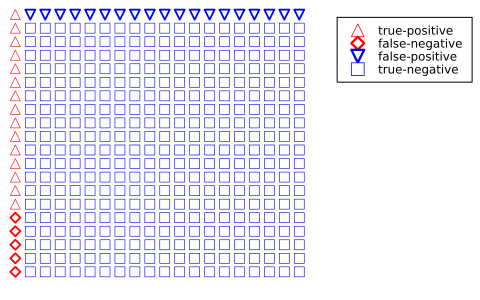

In [7]:
plot_falsepositive(0.05, 0.75, 0.95)

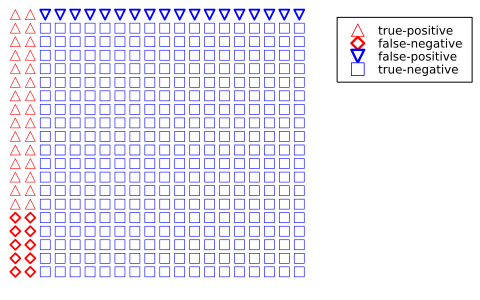

In [8]:
plot_falsepositive(0.10, 0.75, 0.95)

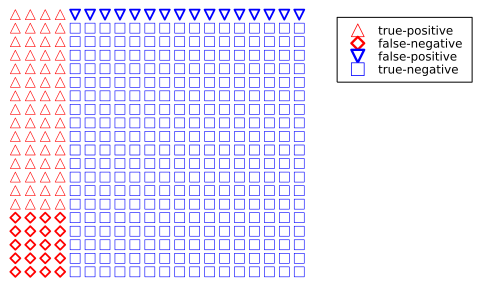

In [9]:
plot_falsepositive(0.20, 0.75, 0.95)

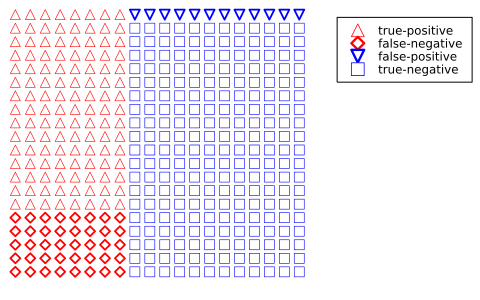

In [10]:
plot_falsepositive(0.40, 0.75, 0.95)

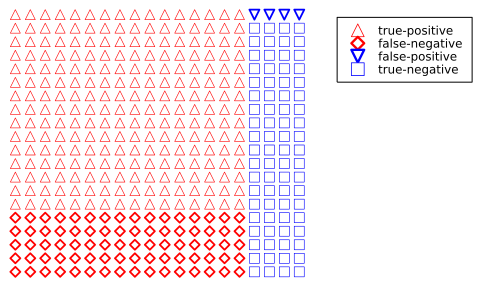

In [11]:
plot_falsepositive(0.80, 0.75, 0.95)

感度(病気有の人が検査陽性になる確率)を $75\%$ から $95\%$ に上げて, 特異度(病気無の人が検査陽性になる確率)が $75\%$ に下がった場合.  当たり前のことだが, 偽陽性(青い下向き三角)が大幅に増える.  検査対象の有病率を $20\%$ まで上げても, 検査陽性者のうち半分以上が病気無になってしまう.

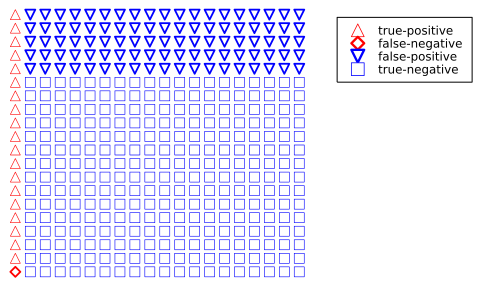

In [12]:
plot_falsepositive(0.05, 0.95, 0.75)

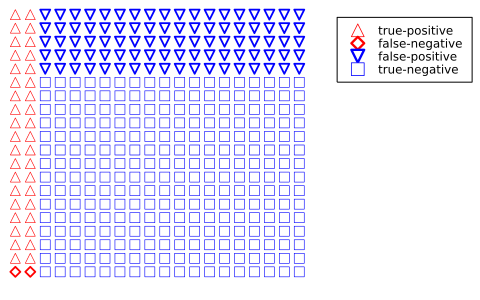

In [13]:
plot_falsepositive(0.10, 0.95, 0.75)

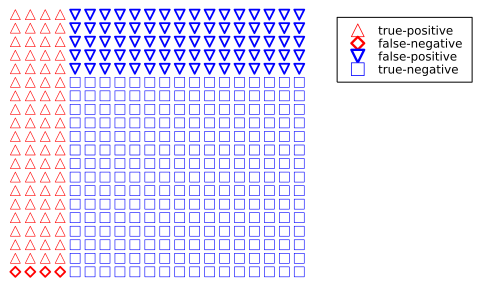

In [14]:
plot_falsepositive(0.20, 0.95, 0.75)

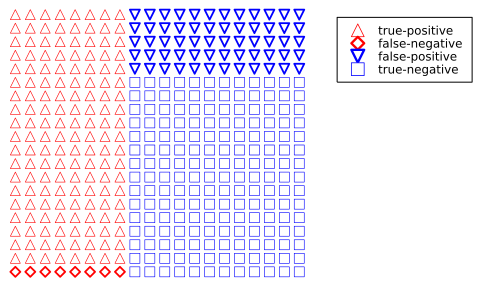

In [15]:
plot_falsepositive(0.40, 0.95, 0.75)

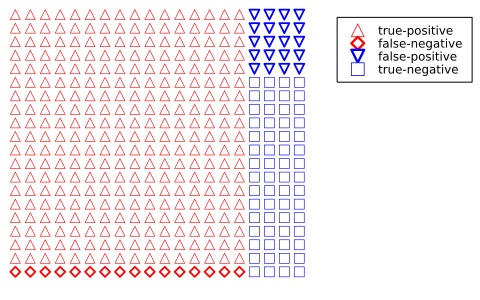

In [16]:
plot_falsepositive(0.80, 0.95, 0.75)

### おまけの問題: モンティ・ホール問題 (Monty Hall problem)

以下のようなゲームを考える:

(1) 親は $1,2,3$ の中から番号 $X$ を無作為に選んで秘密にしておく.

(2) あなたは, $1,2,3$ の中から番号 $1$ を選んでそれを親に告げる.

(3) 親は $1,2,3$ の中から $1$ と $X$ 以外の番号 $Y$ を無作為に選んで, あなたに告げる.

(4) あなたは $1,2,3$ の中から $1$, $Y$ を除いて残った1つの番号 $Z$ を選ぶ.

あなたが最後に選んだ番号 $Z$ が秘密の番号 $X$ に一致する確率を求めよ.

__注意:__ (2)で $1$ を選ばずに $1,2,3$ のどれかを無作為に選んでも結果は同じになる. 

__代表的誤答例:__ $Z=X$ となる確率は $1/2$ である. __誤答終__

__解答例1:__ すべての場合の確率を書き下す方法. 確率 $P(X=x, Y=y)$ 達を表にすると以下のようになる:

$$
\begin{array}{c|ccc|c}
      & Y = 1 & Y = 2 & Y = 3 & \\
\hline
X = 1 & 0     & 1/6   & 1/6   & 1/3 \\
X = 2 & 0     & 0     & 1/3   & 1/3 \\
X = 3 & 0     & 1/3   & 0     & 1/3 \\
\hline
      & 0     & 1/2   & 1/2 & \\
\end{array}
$$

$Y$ として $1$ と $X$ 以外の番号を選ぶので, $Y=1$ の確率は $0$ になる.  $X=1$ となる確率は $1/3$ であり, そのとき, $1$ と $X=1$ 以外の番号は $2,3$ の2つで, それらを無作為に選ぶのでそれぞれに確率は $1/6$ になる.  $X=2$ の場合には常に $Y=3$ となり, $X=3$ の場合には常に $Y=2$ となり, それぞれの確率は $1/3$ になる. これを表にすると上のようになる.

* $X=1$, $Y=2$ のとき $Z=3$ となり, $Z\ne X$ となる.
* $X=1$, $Y=3$ のとき $Z=2$ となり, $Z\ne X$ となる.
* $X=2$, $Y=3$ のとき $Z=2$ となり, $Z = X$ となる.
* $X=3$, $Y=2$ のとき $Z=3$ となり, $Z = X$ となる.

ゆえに $P(Z=X) = P(X=2, Y=3) + P(X=3, Y=2) = 1/3 + 1/3 = 2/3$.

__解答終__

__解答例2:__ あなたが最後に選んだ番号 $Z$ が $X$ に一致しないことと, あなたが最初に選んだ番号 $1$ が $X$ に一致することは同値であり, $X=1$ となる確率は $1/3$ である.  ゆえに, その補事象である $Z=X$ となる確率は $2/3$ である.  

要するに, 最初に選んだ数字が運悪く $X$ に一致していなければ, 最後に選び直して得た $Z$ は $X$ に一致する. たったこれだけの話である.

__解答終__

__注意:__ 単に確率を計算すればよいだけの問題である. 「主観確率」「ベイズ確率」のような用語を持ち出す説明を読むときには, 本当は易しい話を無駄に難しく考えて, おかしな考え方に陥っていることを疑った方がよい.  歴史の偶然のせいで世間的に広まってしまった考え方の多くが間違っている.

### 連続確率分布の条件付き確率分布

連続変数 $(x, y)$ の確率密度函数 $p(x,y)$ が定める連続分布 $D$ を考え, 変数 $y$ に対応する確率変数を $Y$ と書く:

$$
E[f(Y)] = \iint f(y)p(x,y)\,dx\,dy =
\int f(y)\left(\int p(x,y)\,dx\right) dy.
$$

これより, 確率変数 $Y$ が従う分布は確率密度函数

$$
p(y) = \int p(x,y)\,dx
$$

を持つことがわかる. 条件 $Y=y$ が定める $x$ に関する __条件付き確率分布__ の密度函数 $p(x|y)$ を次のように定める:

$$
p(x|y) = \frac{p(x,y)}{p(y)}.
$$

このとき,

$$
\int p(x|y)\,dx = \frac{\int p(x,y)\,dx}{p(y)} = 1
$$

より, $p(x|y)$ がパラメータ $y$ を持つ $x$ の確率密度函数になっていることがわかる.

条件 $Y=y$ という条件のもとでの変数 $x$ に対応する確率変数 $X$ と $y$ 付きの函数 $f(X,y)$ の __条件付き期待値__ を次のように定める:

$$
E[f(X,Y)|Y=y] = E[f(X,y)|y] = \int f(x,y) p(x|y)\,dx.
$$

これと同じ記号法を一般のパラメータ $\theta$ 付きの確率密度函数 $p(x|\theta)$ の場合にも使うことにする:

$$
E[f(X,\theta)|\theta] = \int f(x,\theta) p(x|\theta)\,dx.
$$

__注意:__ 条件付き確率分布の密度函数の定義について.

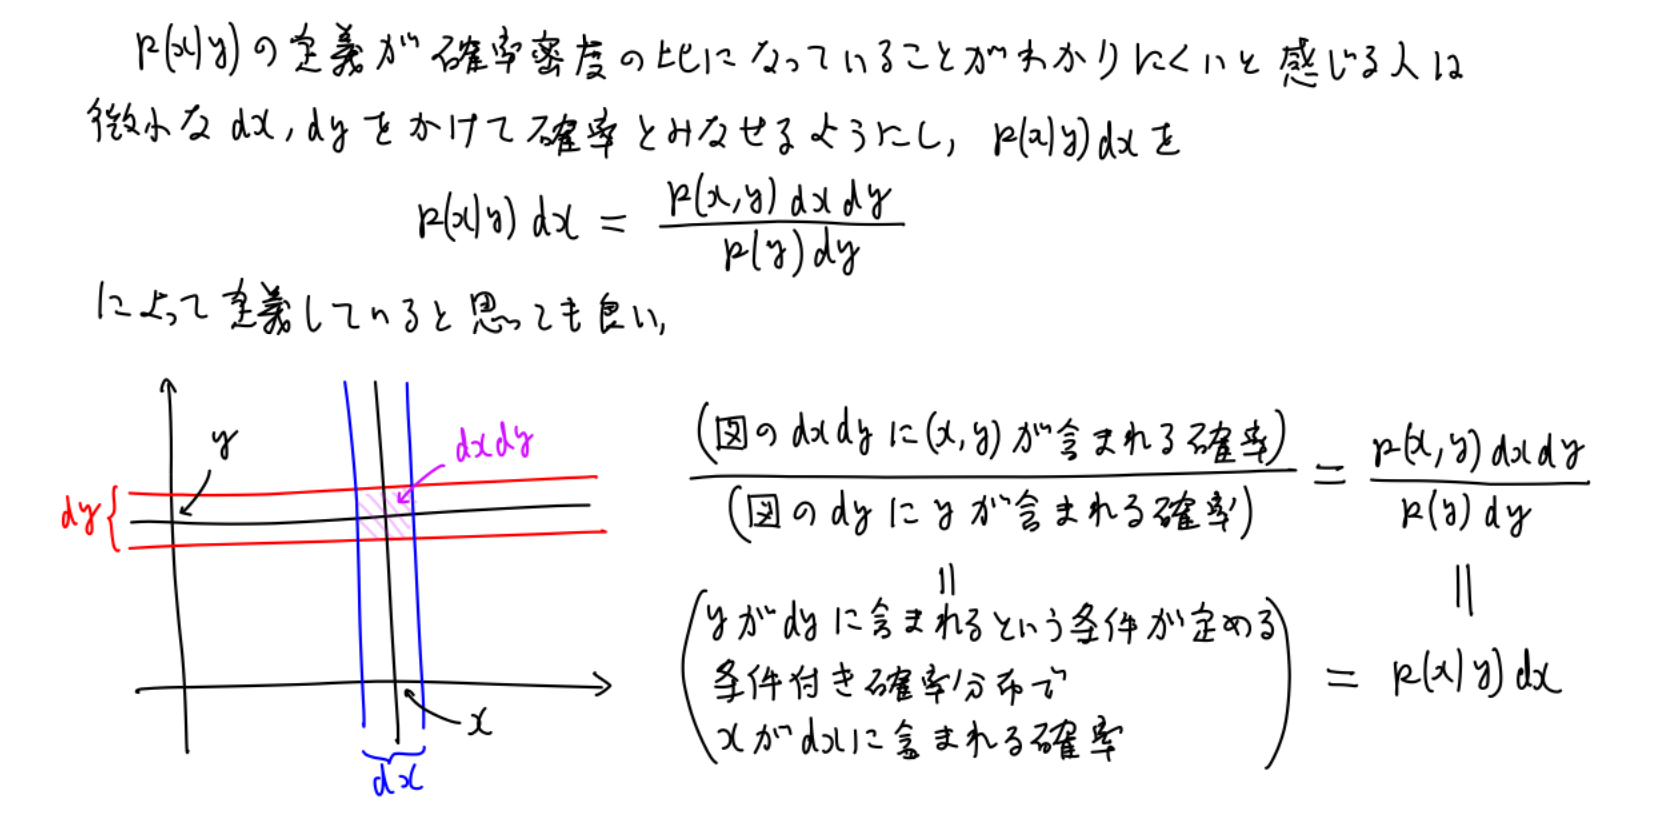

### 条件付き期待値の基本性質(連続分布版)

条件付き期待値 $g(y) = E[f(X,y)|y]$ は $y$ の函数とみなせるので, 確率変数 $E[f(X,Y)|Y] = g(Y)$ が得られる. このとき次が成立することを示せ:

$$
E[g(Y)] = E[E[f(X,Y)|Y]] = E[f(X,Y)].
$$

__解答例:__ 定義通りに計算しよう:

$$
\begin{aligned}
E[f(X,Y)|Y] &= E[g(Y)] = \int g(y)p(y)\,dy
\\ &=
\int E[f(X,y)|y] p(y)\,dy
\\ &=
\int \left(\int f(x,y)p(x|y)\,dx\right)p(y)\,dy
\\ &=
\iint f(x,y)p(x|y)p(y)\,dx\,dy
\\ &=
\iint f(x,y)p(x,y)\,dx\,dy =
E[f(X,Y)].
\end{aligned}
$$

要するに $x,y$ の同時確率密度函数が $p(x,y)=p(x|y)p(y)$ と書けることから, この問題の結論が出て来る.

__解答終__

__注意:__ 測度論的確率論ではこれを一般化して条件付き期待値を定義する.

### 連続分布版のBayesの定理

以下では $\int \cdots dx$ は定積分を意味するとする.

連続変数 $(x,y)$ の確率密度函数 $P(x,y)$ によって連続確率分布が定義されているとする. 以下では, 変数 $x,y$ に対応する確率変数達 $X,Y$ それぞれ単独の確率密度函数を $p(x),p(y)$ と書くことにする:

$$
p(x) = \int p(x,y)\,dy
\quad
p(y) = \int p(x,y)\,dx.
$$

確率密度函数 $p(x), $p(y)$ のそれぞれが定める $x,y$ の分布を __周辺分布__ (marginal distribution)と呼ぶことがある.

このとき, $y$ に対応する確率変数 $Y$ によって $Y=y$ という条件で定義される条件付き確率分布の確率密度函数

$$
p(x|y) = \frac{p(x,y)}{p(y)}, \quad
p(y) = \int p(x,y)\,dx
\tag{1}
$$

だけではなく, $x$ に対応する確率変数 $X$ によって $X=x$ という条件で定義される条件付き確率分布の確率密度函数

$$
p(y|x) = \frac{p(x,y)}{p(x)}, \quad
p(x) = \int P(x,y)\,dy
\tag{2}
$$

が定義される.  このとき

$$
\begin{aligned}
&
p(x,y) = p(x|y)p(y) = p(y|x)p(x),
\\ &
p(x) = \int p(x,y)\,dy = \int p(x|y)p(y)\,dy,
\\ &
p(y) = \int p(x,y)\,dx = \int p(y|x)p(x)\,dx
\end{aligned}
\tag{3}
$$

なので,

$$
\begin{aligned}
&
p(y|x) = \frac{p(x|y)p(y)}{\int p(x|y)p(y)\,dy}, 
\\ &
p(x|y) = \frac{p(y|x)p(x)}{\int p(y|x)p(x)\,dx}.
\end{aligned}
\tag{B}
$$

この結果(B)を __Bayesの定理__ (ベイズの定理)と呼ぶ.

しかし, 以上の議論を見ればわかるように, Bayesの定理は条件付き確率分布の定義を書き直したものに過ぎず, 価値ある新しい考え方が得られるような結果ではない.  しかし, 具体的もしくは理論的な計算で条件付き確率の概念が(B)の形式で使われることがあることは知っておいて損がないと思われるので, このように紹介することにした.

__記号法上の注意1:__ 慣習に従って $p(x)$ と $p(y)$ の違いを独立変数名 $x$, $y$ の違いで区別するという記号法を採用した. これは簡潔に書くための手抜きであり, $p_X(x)$ や $p_Y(y)$ のように書けば独立変数名の違いで区別する必要はなくなる.  以上では簡潔さを重視するスタイルを採用したので混乱しないように注意して欲しい. $p(x|y)$ と $p(y|x)$ の違いも独立変数名 $x,y$ の違いで区別することになった.

__記号法上の注意2:__ $p(y|x) = \dfrac{p(x|y)p(y)}{\int p(x|y)p(y)\,dy}$ における分子の $y$ は独立変数だが, 分母の $y$ は積分変数であり, 異なる意味を持っている. 違うものを同じ記号で書いている.  $\int p(x|y)p(y)\,dy$ は $\int p(x|y')p(y')\,dy'$ と書いた方が混乱を防ぎ易かったかもしれない. しかし, そのようにすると, 変数名を $y$ の1個から $y, y'$ の2個に増やす必要があり, 式の煩雑さが増すので, あえて同じ記号で書くことにした.  混乱しないように注意して欲しい.

__注意:__ Bayes統計ではパラメータ $\theta$ 付きの確率密度函数 $p(x|\theta)$ の他にパラメータ $\theta$ の確率密度函数 $p(\theta)$ も用意して, $x$ と $\theta$ の同時確率密度函数を $p(x,\theta)=p(x|\theta)p(\theta)$ と定義する.  この状況のもとでは, $X=x$ という条件で定義される $\theta$ の条件付き確率分布 $p(\theta|x)$ は次のように表される:

$$
p(\theta|x) = \frac{p(x|\theta)p(\theta)}{\int p(x|\theta)p(\theta)\,d\theta}.
$$

Bayes統計の文脈では, $p(\theta)$ は __事前分布__ (prior)と呼ばれ, $p(x|\theta)$ は __事後分布__ (posterior)と呼ばれる.  Bayes統計では新たな道具として事前分布 $p(\theta)$ を利用できるお陰で, それ抜きでは困難な統計分析も可能になる.  ただし, Bayes統計がそういう優れた性質を持っている理由は「主観確率」や「ベイズ主義」のような概念抜きに語ることができる. この点に関する詳しい説明は次の教科書にある:

* 渡辺澄夫, ベイズ統計の理論と方法, 2012年, コロナ社, 226ページ.

さらに, 次の論説も参考になる:

* 赤池弘次, 統計的推論のパラダイムの変遷について, 統計数理研究所彙報, 1980年第27巻第1号, pp. 5-12.  [link](https://ismrepo.ism.ac.jp/index.php?active_action=repository_view_main_item_detail&page_id=13&block_id=21&item_id=32568&item_no=1)

### 問題: 連続分布の条件付き確率分布の例 (分散が固定された正規分布モデルのBayes統計)

__この節の式には細かい誤りが多数含まれている可能性がある. 誤りを見付けたら自分で訂正すること. 誤りがなかったら, 拍手喝采して欲しい.__

$n, \rho > 0$ を任意に取って固定する.  $x,\mu\in\R$ の同時確率密度函数

$$
p(x,\mu|n,\rho) =
\frac{e^{-n(x-\mu)^2/2}}{\sqrt{2\pi/n}} \frac{e^{-\mu^2/(2\rho^2)}}{\sqrt{2\pi\rho^2}}.
$$

によって定義される $(x, \mu)\in\R^2$ の確率分布を考える. その分布において, 変数 $x$ に対応する確率変数 $X$ に関する条件 $X=x$ で定義された $\mu$ に関する条件付き確率分布の密度函数が

$$
p(\mu|x,n,\rho) = 
\frac{1}{\sqrt{2\pi\rho^2/(1+n\rho^2)}}
\exp\left(-\frac{1+n\rho^2}{2\rho^2}\left(\mu - \frac{n\rho^2 x}{1+n\rho^2}\right)^2\right).
$$

になることを示せ.  これは平均と分散がそれぞれ

$$
\frac{n\rho^2}{1+n\rho^2}x, \quad
\frac{\rho^2}{1+n\rho^2}
$$

の正規分布である.

__注意:__ 特に, $n\to\infty$ とすると, 条件 $X=x$ で定義された $\mu$ の条件付き確率分布の期待値は $x$ に収束し, 分散は $0$ に収束するので,  $\mu$ の条件付き確率分布は $x$ の近くに集中するようになる.

__注意:__ この問題の例は正規分布モデル $p(x|n,\mu) = e^{-n(x-\mu)^2/2}/\sqrt{2\pi/n}$ と事前分布 $p(\mu|\rho) = e^{-\mu^2/(2\rho^2)}/\sqrt{2\pi\rho^2}$ に関するBayes統計におけるデータの数値 $x$ が定める事後分布 $p(\mu|x,n,\rho)$ を求める計算になっている.  $x$ は標本平均に, $n$ はサンプルサイズに対応しており, $p(x|n,\mu)$ の形は分散 $1$ の正規分布のサイズ $n$ 標本分布のおいて標本平均の分散が $1/n$ になることを表している.  だから, この場合には固定された分散 $1$ を持つ正規分布の標本分布を統計モデルとして採用している場合になっていると考えて欲しい.  $n=0$ のとき事後分布が事前分布に一致することにも注意せよ.

__注意:__ 条件付き確率分布の概念はBayes統計に限らず統計学における最も基本的かつ重要な確率論の道具であるが, 特にBayes統計では条件付き確率分布を使った推論が系統的に利用される.

__解答例:__ $X$ 単独の密度函数 $p(x|\rho)$ を求めよう.

$$
\begin{aligned}
n(x-\mu)^2 + \frac{\mu^2}{\rho^2} &=
\frac{1+n\rho^2}{\rho^2}\mu^2 - 2nx\mu + nx^2
\\ &=
\frac{1+n\rho^2}{\rho^2}\left(\mu - \frac{n\rho^2 x}{1+n\rho^2}\right)^2 +
\frac{nx^2}{1+n\rho^2}
\end{aligned}
\tag{$*$}
$$

より,

$$
\begin{aligned}
p(x|n,\rho) &= \int_\R p(x,\mu|n,\rho)\,d\mu
\\ &=
\frac{\exp(-nx^2/(2(1+n\rho^2)))}{\sqrt{2\pi/n}\,\sqrt{2\pi\rho^2}}
\int_\R \exp\left(-\frac{1+n\rho^2}{2\rho^2}\left(\mu - \frac{n\rho^2 x}{1+n\rho^2}\right)^2\right)d\mu
\\ &=
\frac{\exp(-nx^2/(2(1+n\rho^2)))}{\sqrt{2\pi/n}\,\sqrt{2\pi\rho^2}}
\sqrt{\frac{2\pi\rho^2}{1+n\rho^2}}
\\ &=
\frac{1}{\sqrt{2\pi(1+n\rho^2)/n}}
\exp\left(-\frac{x^2}{2(1+n\rho^2)/n}\right).
\end{aligned}
$$

このように $X$ 単独の分布は平均 $0$, 分散 $(1+\rho^2)/n$ の正規分布になる. 

ゆえに, 条件 $X=x$ で定義される $\mu$ の分布の確率密度函数 $p(\mu|x,n,\rho)$ は以下のようになる. すなわち,

$$
n(x-\mu)^2 + \frac{\mu^2}{\rho^2} - \frac{nx^2}{1+n\rho^2} =
\frac{1+n\rho^2}{\rho^2}\left(\mu - \frac{n\rho^2 x}{1+n\rho^2}\right)^2
$$

を使うと, 

$$
p(\mu|x,n,\rho) = \frac{p(x,\mu|n,\rho)}{p(x|n,\rho)} =
\frac{1}{\sqrt{2\pi\rho^2/(1+n\rho^2)}}
\exp\left(-\frac{1+n\rho^2}{2\rho^2}\left(\mu - \frac{n\rho^2 x}{1+n\rho^2}\right)^2\right).
$$

__解答終__

__注意:__ 本当は最初に公式($*$)を得た時点ですべての答えが出ていたと考えられる.  以上では丁寧だが無駄な詳細を含む計算を納得感を高めるためにあえてやってみせたが, 実践的な計算においてはそのように考えるべきである.  以下においても同様に無駄な詳細を含む計算をやってみせる場合があるので注意して欲しい. (要するにこのノートの計算の仕方を実践的な計算で真似しないで欲しいということ.)

In [17]:
@vars n ρ positive=true
@vars x μ

expr1 = n*(x - μ)^2 + μ^2/ρ^2
expr2 = (1+n*ρ^2)/ρ^2 * (μ - n*ρ^2/(1+n*ρ^2)*x)^2
expr3 = (expr1 - expr2).factor()
[
    expr1
    expr2
    expr3
]

3-element Vector{Sym}:
                        n*(x - μ)^2 + μ^2/ρ^2
 (n*ρ^2 + 1)*(-n*x*ρ^2/(n*ρ^2 + 1) + μ)^2/ρ^2
                            n*x^2/(n*ρ^2 + 1)

### 分散が固定された正規分布モデルのBayes統計の事後分布の視覚化

$\mu_0 = 4$, $\rho = 1/2$ とおく.

平均 $\mu_0=4$, 分散 $1$ の正規分布のサイズ $N=2^{10}$ の標本 $X_1,X_2,\ldots,X_N$ をランダムに生成し, $n=0,1,2,4,8,\ldots,1024=2^{10}$ について標本平均 $x = \bar{X}_n = (X_1+\cdots+X_n)/n$ を求め, 前節で求めた $\mu$ の事後分布 $p(\mu|x,n,\rho)$ をプロットしてみよう.

$n$ を大きくすると $\mu$ の事後分布はサンプルを生成した分布の平均値 $\mu_0$ に集中して行く.

これはBayes統計の漸近論的な基礎付けの最も簡単な場合になっている.

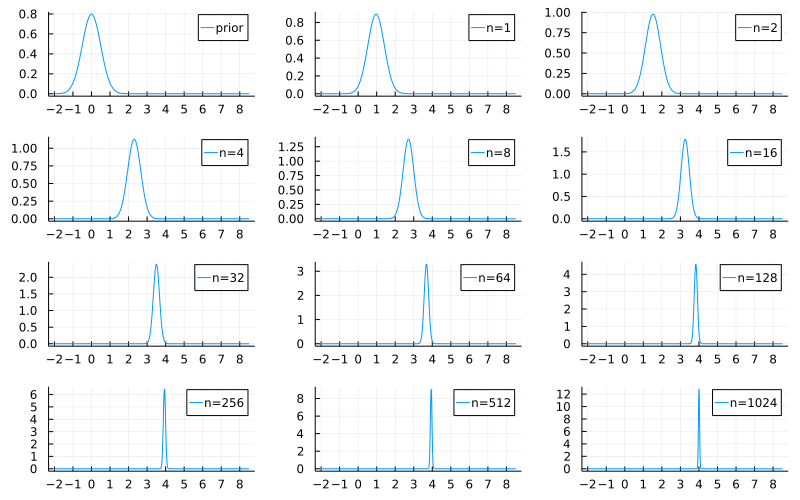

In [18]:
Random.seed!(4649373) # よろしくみなさん

μ₀ = 4
ρ = 1/2
N = 2^10
X = rand(Normal(μ₀, 1), N) # 標本生成
PP = []
prior = Normal(0, ρ)
P = plot(prior, μ₀-6, μ₀+4.5; label="prior", xtick=-10:10)
push!(PP, P)
for k in 0:10
    n = 2^k
    x = mean(@view X[1:n])
    μ_posterior = n*ρ^2*x/(1 + n*ρ^2)
    σ_posterior = √(ρ^2/(1+n*ρ^2))
    posterior = Normal(μ_posterior, σ_posterior)
    P = plot(posterior, μ₀-6, μ₀+4.5; label="n=$n", xtick=-10:10)
    push!(PP, P)
end
plot(PP...; size=(800, 500), layout=(4, 3))

### 問題: 2変量の正規分布とその条件付き確率分布の例

$$
\Sigma =
\begin{bmatrix}
a & b \\
b & d \\
\end{bmatrix}
$$

は固有値がすべて正の実対称行列であるとし, $\mu=(\mu_x, \mu_y) \in \R^2$ であるとする. このとき, 

$$
\Sigma^{-1} = 
\frac{1}{ac-b^2}
\begin{bmatrix}
c & -b \\
-b & a \\
\end{bmatrix}
$$

であり, $(x,y)\in\R^2$ の確率密度函数を

$$
\begin{aligned}
p(x,y) &=
\frac{1}{\det(2\pi\Sigma)^{1/2}}
\exp\left(-\frac{1}{2}
\big[x - \mu_x,\; y - \mu_y \big]
\Sigma^{-1}
\begin{bmatrix}
x - \mu_x \\
y - \mu_y \\
\end{bmatrix}
\right)
\\ &=
\frac{1}{\sqrt{(2\pi)^2(ac-b^2)}}
\exp\left(-\frac
{a(y-\mu_y)^2 - 2b(x-\mu_x)(y-\mu_y) + c(x-\mu_x)^2}
{2(ac-b^2)}
\right)
\end{aligned}
$$

と定めることができる. これが $\iint_{\R^2} p(x,y)\,dx\,dy = 1$ を満たすことは, $\Sigma$ を直交行列で対角すれば示せる. (詳細は略す. 以下では認めて使ってよい.) この確率密度函数が定める確率分布を __2変量正規分布__ と呼び,

$$
\op{MvNormal}(\mu, \Sigma)
$$

と表すことにする. $\mu$ を平均(もしくは期待値)と呼び, $\Sigma$ を __分散共分散行列__ (variance-covariance matrix)と呼ぶ. (この記号法は, 2変量の場合に限定せずに, 任意の __多変量正規分布__ (multivariate normal distribution)にも使用することにする.)

この場合には条件 $X=x$ が定める $y$ に関する条件付き確率分布が, 平均と分散がそれぞれ

$$
\mu = (b/a)(x-\mu_x) + \mu_y, \quad
\sigma^2 = (ac-b^2)/a
$$

の正規分布になることを示せ.

__解答例:__ 上の2変量正規分布において条件 $X=x$ が定める $y$ に関する条件付き確率分布を求めよう.

$$
\begin{aligned}
&
a(y-\mu_y)^2 - 2b(x-\mu_x)(y-\mu_y) + c(x-\mu_x)^2
\\ &=
a\left(y - \mu_y - \frac{b}{a}(x - \mu_x)\right)^2 - \frac{b^2}{a}(x - \mu_x)^2 + c(x - \mu_x)^2
\\ &=
a\left(y - \mu_y - \frac{b}{a}(x - \mu_x)\right)^2 + \frac{ac-b^2}{a}(x - \mu_x)^2.
\end{aligned}
$$

ゆえに,

$$
\begin{aligned}
&
\sqrt{(2\pi)^2(ac-b^2)}\;p(x)
\\ &=
\int_\R \exp\left(-\frac
{a\left(y - \mu_y - (b/a)(x - \mu_x)\right)^2 + ((ac-b^2)/a)(x - \mu_x)^2}
{2(ac-b^2)}
\right)dy
\\ &=
\sqrt{\frac{2\pi(ac-b^2)}{a}}
\exp\left(-\frac{(x - \mu_x)^2}{2a}\right)
\end{aligned}
$$

なので,

$$
p(x) = \frac{1}{\sqrt{2\pi a}}
\exp\left(-\frac{(x - \mu_x)^2}{2a}\right).
$$

これは $x$ の周辺分布が平均 $\mu_x$, 分散 $a$ の正規分布になることを意味している. (実は多変量正規分布の一般論からこれは言えることでもある.) さらに, 

$$
\begin{aligned}
&
a(y-\mu_y)^2 - 2b(x-\mu_x)(y-\mu_y) + c(x-\mu_x)^2 - \frac{ac-b^2}{a}(x - \mu_x)^2
\\ &=
a\left(y - \mu_y - \frac{b}{a}(x - \mu_x)\right)^2
\end{aligned}
$$

より,

$$
\begin{aligned}
p(y|x) &=
\frac{p(x,y)}{p(x)} =
\frac{1}{\sqrt{2\pi(ac-b^2)/a}}
\exp\left(-\frac
{a\left(y - \mu_y - (b/a)(x - \mu_x)\right)^2}
{2(ac-b^2)}
\right).
\end{aligned}
$$

これは条件 $X=x$ が定める $y$ の条件付き確率分布が平均 $(b/a)(x-\mu_x) + \mu_y$, 分散が $(ac-b^2)/a$ の正規分布になることを意味している. 

__注意:__ 以上の計算を一般の多変量正規分布に一般化すれば __Gauss過程回帰__ が得られる.

__注意:__ 最小二乗法による線形回帰との関係.  条件付き確率分布の平均と分散は $\sigma_x^2 = a$, $\sigma_{xy} = b$, $\sigma_y^2 = c$ と書くと,

$$
\frac{b}{a}(x-\mu_x) + \mu_y = \frac{\sigma_{xy}}{\sigma_x^2}(x - \mu_x) + \mu_y, \quad
\frac{ac-b^2}{a} = \frac{\sigma_x^2\sigma_y^2 - \sigma_{xy}^2}{\sigma_x^2}
$$

と表される.  これは「標本分布について」のノートで導出したデータ $(x_1,y_1),\ldots,(x_n,y_n)$ に関する最小二乗法による線形回帰の公式

$$
\hat\alpha + \hat\beta x = \frac{s_{xy}}{s_x^2}(x - \bar{x}) + \bar{y}, \quad
\hat\sigma^2 = \frac{n-1}{n}\frac{s_x^2 s_y^2 - s_{xy}^2}{s_x^2}
$$

に非常に似ている. ここで

$$
\begin{aligned}
&
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i, \quad
\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i,
\\ &
s_x^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2, \quad
s_y^2 = \frac{1}{n-1}\sum_{i=1}^n (y_i - \bar{y})^2,
\\ &
s_{xy} = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}).
\end{aligned}
$$

さらに, 

$$
\begin{aligned}
&
\hat\mu_x = \bar{x} = \frac{1}{n}\sum_{i=1}^n x_i, \quad
\hat\mu_y = \bar{y} = \frac{1}{n}\sum_{i=1}^n y_i,
\\ &
\hat\sigma_x^2 = \frac{n-1}{n}s_x^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2, \quad
\hat\sigma_y^2 = \frac{n-1}{n}s_y^2 = \frac{1}{n}\sum_{i=1}^n (y_i - \bar{y})^2,
\\ &
\hat\sigma_{xy} = \frac{n-1}{n}s_{xy} = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}).
\end{aligned}
$$

とおくと,

$$
\hat\alpha + \hat\beta x = \frac{\hat\sigma_{xy}}{\hat\sigma_x^2}(x - \hat\mu_x) + \hat\mu_y, \quad
\hat\sigma^2 = \frac{\hat\sigma_x^2 \hat\sigma_y^2 - \hat\sigma_{xy}^2}{\hat\sigma_x^2}
$$

となり, 式の類似性はさらに増す.

この類似は偶然ではない. 最小二乗法による線形回帰は, データ $(x_1,y_1),\ldots,(x_n,y_n)$ に最もフィットする2変量正規分布を最尤法で構成し($\hat\mu_x$, $\hat\mu_y$, $\hat\sigma_x^2$, $\hat\sigma_y^2$, $\hat\sigma_{xy}$ がその最尤法の解になっている), 条件 $X=x$ で定められた $y$ に関する条件付き確率分布を求めることと数学的に同じことになっている.

### 2変量の正規分布とその条件付き確率分布の例の視覚化

以下では前節の内容を2変量正規分布の乱数を大量に生成することによって数値的に確認してみよう.

In [19]:
# 二変量正規分布
μ = [10, 20]
Σ = [
    6 2
    2 3
]
mvnormal = MvNormal(μ, Σ)

FullNormal(
dim: 2
μ: [10.0, 20.0]
Σ: [6.0 2.0; 2.0 3.0]
)


In [20]:
# X, Y 単独の分布
xdist = Normal(μ[1], √Σ[1,1])
ydist = Normal(μ[2], √Σ[2,2])
@show xdist ydist;

xdist = Normal{Float64}(μ=10.0, σ=2.449489742783178)
ydist = Normal{Float64}(μ=20.0, σ=1.7320508075688772)


In [21]:
# 条件X=xが定めるyの条件付き確率分布の平均値 (≈ 回帰直線 (regression line))
f(x, μ, Σ) = (Σ[1,2]/Σ[1,1])*(x - μ[1]) + μ[2]

f (generic function with 1 method)

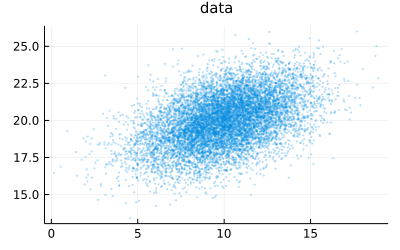

In [22]:
# テストデータの生成: 二変量正規分布の分布は楕円状になる.
n = 10^4
XY = rand(mvnormal, n)
X, Y = XY[1,:], XY[2,:]
scatter(X, Y; ma=0.3, ms=2, msw=0, label="", title="data")

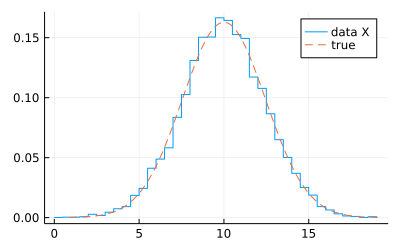

In [23]:
# データでのX単独の分布
stephist(X; norm=true, label="data X")
plot!(xdist; label="true", ls=:dash)

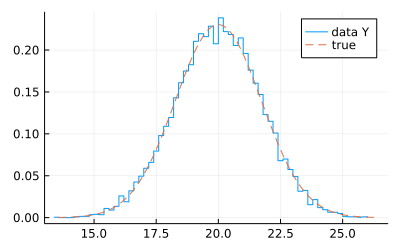

In [24]:
# データでのY単独の分布
stephist(Y; norm=true, label="data Y")
plot!(ydist; label="true", ls=:dash)

In [25]:
# μの最尤推定
μ̂ = mean(XY, dims=2)

2×1 Matrix{Float64}:
  9.986931890736575
 19.987253275638245

In [26]:
# Σの最尤推定
Σ̂ = cov(XY'; corrected=false)

2×2 Matrix{Float64}:
 6.04319  1.9508
 1.9508   2.95852

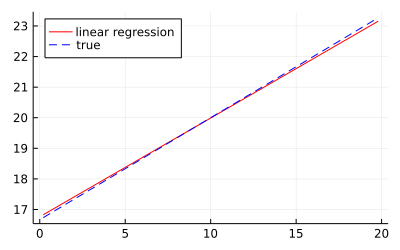

In [27]:
# 条件X=xが定めるyの条件付き確率分布の期待値と回帰直線の比較
xlim = (μ[1] - 4√Σ[1,1], μ[1] + 4√Σ[1,1])
plot(x -> f(x, μ̂, Σ̂), xlim...; label="linear regression", c=:red)
plot!(x -> f(x, μ, Σ), xlim...; label="true", ls=:dash, c=:blue)
plot!(; legend=:topleft)

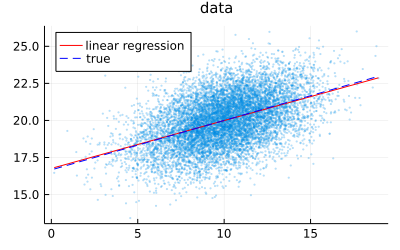

In [28]:
# サンプルとまとめてプロット
scatter(X, Y; ma=0.3, ms=2, msw=0, label="", title="data")
plot!(x -> f(x, μ̂, Σ̂); label="linear regression", c=:red)
plot!(x -> f(x, μ, Σ); label="true", ls=:dash, c=:blue)
plot!(; legend=:topleft)

In [29]:
# 条件X=xが定めるyの条件付き確率分布の分散とその推定値の比較
σ² = det(Σ)/Σ[1,1]
σ̂² = det(Σ̂)/Σ̂[1,1]
@show σ² σ̂²;

σ² = 2.3333333333333335
σ̂² = 2.328779918715761


以下では, $x,y$ の同時確率密度函数 $p(x,y)$ (これは平均 $\mu$ と分散共分散行列 $\Sigma$ を持つ二変量正規分布の密度函数)と $x$ で条件付けられた $y$ に関する条件付き確率分布の密度函数 $p(y|x) = p(x,y)/p(x)$ のヒートマップ(値が大きなところほど明るくプロットされる)を比較してみよう.

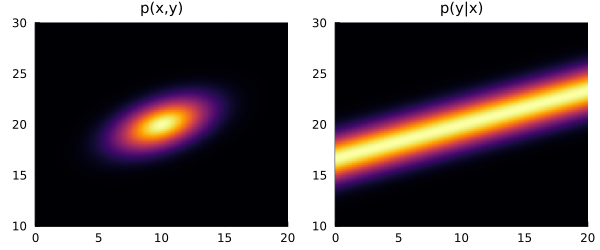

In [30]:
f(x, y) = pdf(mvnormal, SVector(x, y)) # p(x,y)
f(x) = pdf(xdist, x) # p(x)
g(x, y) = f(x, y)/f(x)

x = range(0, 20, 300)
y = range(10, 30, 300)

P1 = heatmap(x, y, f; colorbar=false, title="p(x,y)")
P2 = heatmap(x, y, g; colorbar=false, title="p(y|x)")
plot(P1, P2; size=(600, 250))

$p(x,y)$ は $xy$ 平面上の確率密度函数になっている. 

$p(y|x)$ は各 $x$ ごとに $y$ 軸に平行な直線上の確率密度函数になっている.

その様子の違いの典型例が上のグラフからわかる.

$p(y|x)$ のヒートマップを見れば, パラメータ $x$ を持つ $y$ の確率密度函数は $x$ を $y$ に対応させる函数の一般化($x$ に対応する $y$ の値が確率的に揺らぐ)になっていることもわかる.

## 2×2の分割表の分布

実践的によく使われている2×2の分割表のモデルになる確率分布を紹介しよう.

2×2の分割表とは数学的には0以上の整数を成分とする2×2の行列

$$
A =
\begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix} =
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{bmatrix},
\quad a_{ij} \in \Z_{\ge 0}
$$

のことである.  以下では2×2の分割表の集合に順次制限して狭くして行きながら, 4種類の確率分布を紹介する.

それら4種の確率分布達は条件付け確率分布の階層をなしている.

### 4つのPoisson分布の積

$\lambda_{ij} \ge 0$ であるとし, 

$$
\lambda =
\begin{bmatrix}
\lambda_{11} & \lambda_{12} \\
\lambda_{21} & \lambda_{22} \\
\end{bmatrix}
$$

とおく.  制限のない分割表 $A=[a_{ij}]$ 達の確率質量函数

$$
P(A|\lambda) =
\prod_{i,j=1}^2\left(e^{-\lambda_{ij}}\frac{\lambda_{ij}^{a_{ij}}}{a_{ij}!}\right)
\qquad (a_{ij}\in\Z_{\ge 0})
$$

で定まる分割表の確率分布を __4つのPoisson分布の積__ と呼ぶことにする.

分割表の4つのPoisson分布の積モデルはある一定期間のあいだ収集したサンプルを2つの条件 $X,Y$ を使って次のように分類することによって得られた2×2の分割表のモデルになっていると考えられる:

* $a_{11}$ はサンプル中の $X$ でかつ $Y$ であるものの個数で, $a_{12}$ は $X$ でかつ $Y$ でないものの個数で,  $a_{21}$ は $X$ でなくて $Y$ であるものの個数で, $a_{22}$ は $X$ でも $Y$ でもないものの個数であるとする.

以上の設定のもとで4つのPoisson分布の期待値は

$$
\lambda =
\begin{bmatrix}
\lambda_{11} & \lambda_{12} \\
\lambda_{21} & \lambda_{22} \\
\end{bmatrix}
$$

に一致する.

### 四項分布

$\theta_{ij}\ge 0$, $\sum_{i,j=1}^2 \theta_{ij} = 1$ であるとし, 

$$
\theta =
\begin{bmatrix}
\theta_{11} & \theta_{12} \\
\theta_{21} & \theta_{22} \\
\end{bmatrix}
$$

とおく.  $n\in\Z_{\ge 0}$ を任意に取って固定し, 成分の総和が $n$ になるという条件

$$
\sum_{i,j=1}^2 a_{ij} = n
$$

を満たす分割表 $A=[a_{ij}]$ に関する確率分布が次の確率質量函数によって定められる:

$$
P(A|n,\theta) = n!\prod_{i,j=1}^4 \frac{\theta_{ij}^{a_{ij}}}{a_{ij}!}
\qquad
(a_{11}+a_{12}+a_{21}+a_{22} = n)
$$

これは __四項分布__ である.

分割表の四項分布モデルは, 最初に決めておいたサイズ $n$ のサンプルを収集して, 2つの条件 $X,Y$ を使って前節を同じようにサンプルを分類することによって得られた分割表のモデル化になっていると考えられる.

この四項分布の期待値は

$$
n\theta =
\begin{bmatrix}
n\theta_{11} & n\theta_{12} \\
n\theta_{21} & n\theta_{22} \\
\end{bmatrix}
$$

になる.

### 2つの二項分布の積

$0\le\eta_i\le 1$ ($i=1,2$)であるとし, $\eta = (\eta_1, \eta_2)$ とおく. $r_1, r_2 \in\Z_{\ge 0}$ を任意に取って固定し, $r=(r_1,r_2)$ とおく. このとき, 横方向の合計(横方向のマージン)が

$$
\sum_{j=1}^n a_{ij} = r_i \quad (i=1,2)
$$

と固定されているような分割表の確率分布を次の確率質量函数によって定めることができる:

$$
P(A|r,\eta) =
\binom{r_1}{a_{11}} \eta_1^{a_{11}}(1 - \eta_2)^{a_{12}} \cdot
\binom{r_2}{a_{21}} \eta_1^{a_{21}}(1 - \eta_2)^{a_{22}}
\quad (a_{i1}+a_{i2}=r_i)
$$

これを __2つの二項分布の積__ と呼ぶ.

分割表の2つの二項分布の積モデルは, 前もって決めておいたサイズ $r_1, r_2$ の条件 $X$ を満たす群と満たさない群のサンプルを取得して, 条件 $Y$ によって分類することによって得られた分割表のモデル化になっていると考えられる.

この設定のもとで, 2つの二項分布の積の期待値は

$$
\begin{aligned}
r_1\eta_1 & r_1(1-\eta_1) \\
r_2\eta_2 & r_2(1-\eta_2) \\
\end{aligned}
$$

になる.

### Fisherの非心超幾何分布

$\omega > 0$ であるとする. $r_1,r_2,s_1,s_2,n\in\Z_{\ge 0}$ で

$$
n = r_1+r_2 = s_1+s_2
$$

という条件を満たすものを任意に取って固定し, $r=(r_1,r_2)$, $s=(s_1,s_2)$ とおく. このとき, 横方向の合計と縦方向の合計の両方(全マージン)が

$$
\sum_{j=1}^2 a_{ij} = r_i \quad(i=1,2), \qquad
\sum_{i=1}^2 a_{ij} = s_j \quad(j=1,2)
$$

と固定されているような分割表の確率分布を次の形の確率質量函数によって定めることができる:

$$
\begin{aligned}
&
P(A|r,s,\omega)
\\ &=
Z(r,s,\omega)^{-1}\frac{\omega^{a_{11}}}{\prod_{i,j=1}^2 a_{ij}!} =
\frac{\omega^{a_{11}}}{\widetilde{Z}(r,s,\omega)}
\binom{n}{r_1}^{-1}\binom{s_1}{a_{11}}\binom{s_2}{a_{12}}
\\ &=
\frac{\omega^{a_{11}}}{\widetilde{Z}(r,s,\omega)}
\binom{r_1}{a_{11}}
\frac{s_1(s_1-1)\cdots(s_1-a_{11}+1)\,s_2(s_2-1)\cdots(s_2-(r_1-a_{11})+1)}
{n(n-1)\cdots(n-r_1+1)}.
\\ &
(a_{i1}+a_{i2}=r_i,\; a_{1j}+a_{2j}=s_j)
\end{aligned}
$$

これを __Fisherの非心超幾何分布__ (Fisher's noncentral hypergeometric distribution)と呼ぶ.

パラメータの函数達 $Z(r,s,\omega)$, $\widetilde{Z}(r,s,\omega)$ は確率の総和が $1$ になるという条件で決める.  一般にそれらの定数の具体形はシンプルに書けないが, $\omega = 1$ の場合は例外的に,

$$
\widetilde{Z}(r,s,1) = 1, \quad
Z(r,s,1) = \frac{n!}{r_1!r_2!s_1!s_2!}
$$

とシンプルな形になり, 

$$
P(A|r,s,1) =
\binom{n}{r_1}^{-1} \binom{s_1}{a_{11}}\binom{s_2}{a_{12}} =
\frac{r_1!r_2!s_1!s_2!}{n!a_{11}!a_{12}!a_{21}!a_{22}!}
$$

となる.  この $\omega=1$ の場合のFisherの非心超幾何分布は単に __超幾何分布__ と呼ばれている. 

__注意:__ 超幾何分布の期待値は

$$
\begin{bmatrix}
r_1s_1/n & r_1s_2/n \\
r_2s_1/n & r_2s_2/n \\
\end{bmatrix}
$$

になる. Fisherの非心超幾何分布の期待値についてはこのようなシンプルな公式はない.

__注意:__ 超幾何分布の確率質量函数の上の表示は以下のような解釈を持つ. 

袋の中に $s_1$ 個の赤い玉と $s_2$ 個の白い玉が入っているとし, その中から $r_1$ 個の玉を一度にまとめて無作為に取り出す.  取り出した $r_1$ 個の玉の中の赤い玉の個数を $a_{11}$ とし, 白い玉の個数を $a_{12} = r_1 - a_{11}$ と書き, 袋の中に残された $r_2$ 個の玉の中の赤い玉の個数を $a_{21}=s_1-a{11}$ と書き, 白い玉の個数を $a_{22}=s_2-a_{12} = s_2 - r_1 + a_{11}$ と書き, 2×2の分割表 $A=[a_{ij}]$ を作る.  $a_{11}$ だけから残りの $a_{12},a_{21}.a_{22}$ の値が決定される.

このとき, $A$ の分布は前節の超幾何分布に従う. なぜならば, 袋の中の $n=s_1+s_2$ 個の玉の中から $r_1$ 個を一度に取り出す組み合わせ全体の個数は $\binom{n}{r_1}$ であり(分母), 袋の中の $s_1$ 個の赤い玉の中から $a_{11}$ 個選ぶ組み合わせ全体の個数と $s_2$ 個の白い玉の中から $a_{12}$ 個選ぶ組み合わせ全体の個数の積は $\binom{s_1}{a_{11}}\binom{s_2}{a_{12}}$ になる(分子)からである.になる.

__注意:__ 超幾何分布と非復元抽出の関係. 超幾何分布の確率質量函数は次のようにも表される:

$$
P(A|r,s,1) =
\binom{r_1}{a_{11}}
\frac{s_1(s_1-1)\cdots(s_1-a_{11}+1)\,s_2(s_2-1)\cdots(s_2-(r_1-a_{11})+1)}
{n(n-1)\cdots(n-r_1+1)}.
$$

この公式は以下のような解釈を持つ.  袋の中に $s_1$ 個の赤い玉と $s_2$ 個の白い玉が入っているとし, $s_1+s_2=n$ であるとする.  袋の中から無作為に1個ずつ玉を取り出す.  ただし, 取り出した玉は袋に戻さないとする(非復元抽出).  そのように玉を $r_1$ 個取り出したとき, その中に赤い玉が $a_{11}$ 個含まれる確率が超幾何分布における確率の値 $P(A|r,s,1)$ になる.

__注意:__ 以上の状況のもとで $a_{11}$ が動ける範囲はちょうど次になる:

$$
\max(0, r_1 - s_2) \le a_{11} \le \min(s_1, r_1).
$$

この条件は以下の条件を整理することによって得られる:

$$
\begin{aligned}
&
a_{11} \ge 0,
\\ &
a_{11} = r_1 - a_{12} \le r_1,
\\ &
a_{11} = s_1 - a_{21} \le s_1,
\\ &
a_{11} = r_1 - s_2 + a_{22} \ge r_1 - s_2.
\end{aligned}
$$

これらの等式部分は以下から得られる:

$$
\begin{aligned}
&
a_{12} = r_1 - a_{11},
\\ &
a_{21} = s_1 - a_{11},
\\ &
a_{22} = s_2 - a_{12} = s_2 - r_1 + a_{11}.
\end{aligned}
$$

__注意:__ 2×2の分割表のFisherの非心超幾何分布およびその特別な場合である超幾何分布においては $a_{11}$ の値を決めれば他の $a_{12},a_{21},a_{22}$ の値が決まるので, それらは

$$
\max(0, r_1 - s_2) \le a_{11} \le \min(s_1, r_1)
$$

を満たす整数 $a_{11}$ のみに関する確率分布だとみなされる.  $a_{11}$ のみに関するFisherの非心超幾何分布を

$$
\op{FisherNoncentralHypergeometric}(s_1, s_2, r_1, \omega)
$$

と書き, 超幾何分布を

$$
\op{Hypergeometric}(s_1, s_2, r_1)
$$

と書くことにする. $\op{Hypergeometric}(s_1, s_2, r_1)$ は $s_1$ 個の赤い玉と $s_2$ 個の白い玉が入っている袋から取り出した $r_1$ 個の玉の中の赤い玉の個数 $a_{11}$ の分布になっている.

袋の中の赤い玉の個数 $s_1$ が取り出す玉の個数 $r_1$ より小さい場合には取り出した $r_1$ 個の玉がすべて赤い玉になること ($a_{11}=s_1$) はありえず, 袋の中の白い玉の個数 $s_2$ が取り出す玉の個数 $r_1$ より小さい場合には取り出した $r_1$ 個の玉がすべて白い玉になること($a_{11}=0$)となることはありえない.  このことに注意すれば $a_{11}$ の動く範囲についても理解し易いだろう.

### Fisherの非心超幾何分布の正規分布近似の視覚化

Fisherの非心超幾何分布 $\op{FisherNoncentralHypergeometric}(s, f, n)$ も $s, f, n$ が十分大きければ正規分布で近似される.

In [31]:
function plot_fnch(s₁, s₂, r₁, ω)
    fnch = FisherNoncentralHypergeometric(s₁, s₂, r₁, ω)
    μ, σ = mean(fnch), std(fnch)
    xlim = (max(-1.0, μ-4σ), min(maximum(fnch)+1.0, μ+4σ))
    x = range(xlim..., 1000)
    plot(x -> mypdf(fnch, x), xlim...; label="")
    plot!(Normal(μ, σ); label="", ls=:dash)
    title!("s₁=$s₁, s₂=$s₂, r₁=$r₁, ω=$ω")
end

plot_fnch (generic function with 1 method)

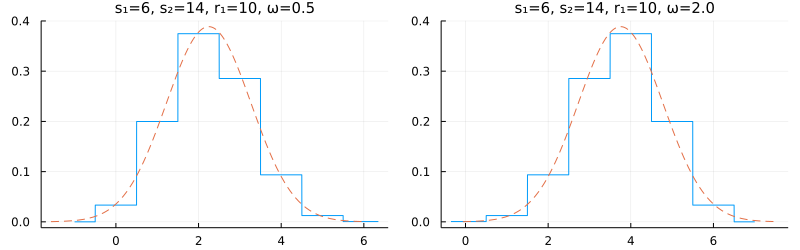

In [32]:
plot(plot_fnch(6, 14, 10, 0.5), plot_fnch(6, 14, 10, 2.0); size=(800, 250))

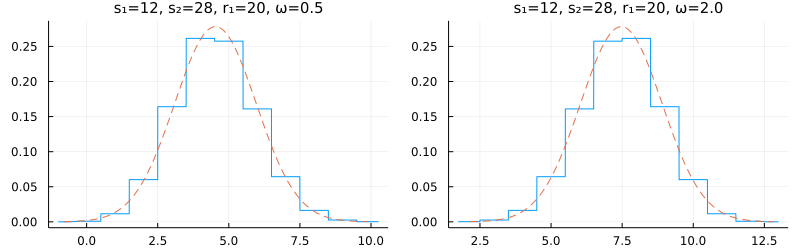

In [33]:
plot(plot_fnch(12, 28, 20, 0.5), plot_fnch(12, 28, 20, 2.0); size=(800, 250))

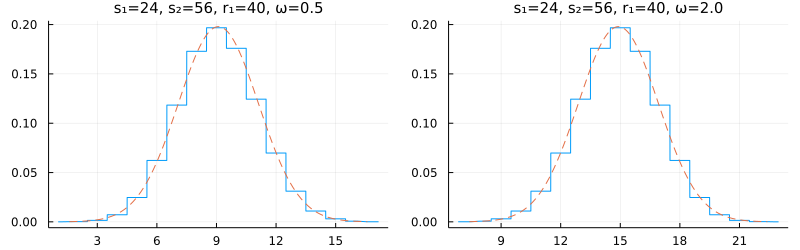

In [34]:
plot(plot_fnch(24, 56, 40, 0.5), plot_fnch(24, 56, 40, 2.0); size=(800, 250))

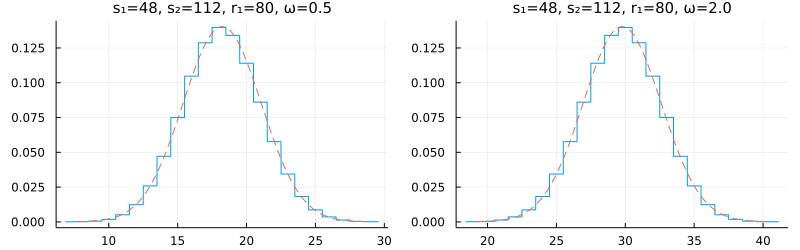

In [35]:
plot(plot_fnch(48, 112, 80, 0.5), plot_fnch(48, 112, 80, 2.0); size=(800, 250))

### 四項分布は4つのPoisson分布の積の条件付き確率分布

オッズ比 $\omega$ を次のように定める:

$$
\omega =
\frac{\lambda_{11}/\lambda_{12}}{\lambda_{21}/\lambda_{22}} =
\frac{\lambda_{11}\lambda_{22}}{\lambda_{12}\lambda_{21}}.
$$

4つのPoisson分布の積の確率質量函数を $\sum_{i,j=1}a_{ij}=n$ が固定された場合に制限してみよう.

$$
\theta_{ij} = \frac{\lambda_{ij}}{\sum_{i',j'=1}^n \lambda_{i'j'}}
$$

とおくと,

$$
\omega =
\frac{\theta_{11}/\theta_{12}}{\theta_{21}/\theta_{22}} =
\frac{\theta_{11}\theta_{22}}{\theta_{12}\theta_{21}}
$$

でかつ,

$$
\begin{aligned}
P(A|\lambda) &=
\prod_{i,j=1}^2\left(e^{-\lambda_{ij}}\frac{\lambda_{ij}^{a_{ij}}}{a_{ij}!}\right) =
\underbrace{
\frac{1}{n!} e^{-\sum_{i,j=1}^2 \lambda_{ij}}\left(\sum_{i,j=1}^2 \lambda_{ij}\right)^n
}_{\text{independent of $a_{ij}$}}
\;
n!\prod_{i,j=1}^2\frac{\theta_{ij}^{a_{ij}}}{a_{ij}!}.
\end{aligned}
$$

ゆえに, 四項分布における確率の総和が1であること

$$
\sum_{\sum_{i,j=1}^2 a_{ij}=n}
n!\prod_{i,j=1}^2\frac{\theta_{ij}^{a_{ij}}}{a_{ij}!} = 1
$$

より, 

$$
P(n|\lambda) = \sum_{\sum_{i,j=1}^2 a_{ij}=n} P(A|\lambda) =
\frac{1}{n!}
e^{-\sum_{i,j=1}^2 \lambda_{ij}}\left(\sum_{i,j=1}^2 \lambda_{ij}\right)^n.
$$

ゆえに, $\sum_{i,j=1}^2 a_{ij}=n$ という条件で定義される条件付き確率分布の確率質量函数は

$$
\frac{P(A|\lambda)}{P(n|\lambda)} =
n!\prod_{i,j=1}^2\frac{\theta_{ij}^{a_{ij}}}{a_{ij}!}
$$

と, 四項分布の確率質量函数になる.

### 2つの二項分布の積は四項分布は4つの条件付き確率分布

四項分布の確率質量函数を $\sum_{j=1}^2 a_{ij} = r_i$, $r_1+r_2=n$ の場合に制限してみよう.

$$
\eta_i = \frac{\theta_{i1}}{\theta_{i1}+\theta_{i2}}
$$

とおくと,

$$
\omega =
\frac{\eta_1/(1-\eta_1)}{\eta_2/(1-\eta_2)} =
\frac{\eta_1(1-\eta_2)}{(1-\eta_1)\eta_2}
$$

でかつ,

$$
\begin{aligned}
&
P(A|n,\theta) = 
n!\prod_{i,j=1}^4 \frac{\theta_{ij}^{a_{ij}}}{a_{ij}!} =
\underbrace{
n!\prod_{i=1}^2(\theta_{i1}+\theta_{i2})^{r_i}
}_{\text{independent of $a_{ij}$}}
\cdot
\frac{\eta_1^{a_{11}}(1-\eta_1)^{r_1-a_{11}}}{a_{11}!(r_1-a_{11})!}
\frac{\eta_2^{a_{21}}(1-\eta_2)^{r_1-a_{21}}}{a_{21}!(r_2-a_{21})!}
\\ &=
\underbrace{
\binom{n}{r_1}\prod_{i=1}^2(\theta_{i1}+\theta_{i2})^{r_i}
}_{\text{independent of $a_{ij}$}}
\cdot
\binom{r_1}{a_{11}}
\eta_1^{a_{11}}(1-\eta_1)^{r_1-a_{11}}
\cdot
\binom{r_2}{a_{21}}
\eta_2^{a_{21}}(1-\eta_2)^{r_1-a_{21}}
\end{aligned}
$$

これを $a_{11}+a_{12}=r_1$, $a_{21}+a_{22}=r_2$ を満たす分割表について和を取ると, 2つの二項分布の積の部分の和が $1$ になる.  ゆえに

$$
P(r|n,\theta) =
\binom{n}{r_1}\prod_{i=1}^2(\theta_{i1}+\theta_{i2})^{r_i} =
\binom{n}{r_1}
(\theta_{11}+\theta_{12})^{r_1}
(1-(\theta_{11}+\theta_{12}))^{n-r_1}.
$$

したがって, 条件 $a_{11}+a_{12}=r_1$, $a_{21}+a_{22}=r_2$ が定める条件付き確率分布の確率質量函数は次の形になる:

$$
\frac{P(A|n,\theta)}{P(r|n,\theta)} =
\binom{r_1}{a_{11}}
\eta_1^{a_{11}}(1-\eta_1)^{r_1-a_{11}}
\cdot
\binom{r_2}{a_{21}}
\eta_2^{a_{21}}(1-\eta_2)^{r_1-a_{21}}.
$$

これは2つの二項分布の積の確率質量函数である.

### Fisherの非心超幾何分布は2つの二項分布の積の条件付き確率分布

2つの二項分布の積の確率質量函数をさらに $\sum_{i=1}^2 a_{ij}=s_j$, $s_1+s_2=n$ の場合に制限してみよう. そのとき,

$$
a_{21} = s_1 - a_{11}, \quad
a_{22} = s_2 - r_1 + a_{11}, \quad
\omega = \frac{\eta_1(1-\eta_2)}{(1-\eta_1)\eta_2}
$$

であることを使うと, 

$$
\begin{aligned}
P(A|r,\theta) &=
\binom{r_1}{a_{11}}
\eta_1^{a_{11}}(1-\eta_1)^{r_1-a_{11}}
\cdot
\binom{r_2}{a_{21}}
\eta_2^{a_{21}}(1-\eta_2)^{r_2-a_{21}}
\\ &=
\frac{r_1!}{a_{11}!a_{12}!}
\eta_1^{a_{11}}(1-\eta_1)^{r_1-a_{11}}
\cdot
\frac{r_2!}{a_{21}!a_{22}!}
\eta_2^{s_1-a_{11}}(1-\eta_2)^{s_2-r_1+a_{11}}
\\ &=
\underbrace{
r_1!r_2!(1-\eta_1)^{r_1}\eta_2^{s_1}(1-\eta_2)^{s_2-r_1}
}_{\text{independent of $a_{ij}$}}
\frac{\omega^{a_{11}}}{a_{11}!a_{12}!a_{21}!a_{22}!}.
\end{aligned}
$$

これより, 2つの二項分布の積における条件 $\sum_{i=1}^2 a_{ij}=s_j$ に関する条件付き確率分布がFisherの非心超幾何分布になることがわかる.

### 独立性条件

以上における条件付き確率分布の構成でオッズ比 $\omega$ が保たれて行くことに注意せよ. 以上で扱った4種類の確率分布は $\omega = 1$ を満たすとき __独立である__, もしくは, __独立性条件を満たす__ という. 

2つの二項分布の積においては独立であることと $\eta_1=\eta_2$ であることは同値である.  $\eta_i$ は __比率__ と呼ばれることがあり, $\eta_1=\eta_2$ は比率が等しいという条件になる.

「比率が等しい」という仮説の検定で $\omega = 1$ の統計モデルが使用される.

たとえば, タバコを吸っているかどうかの条件を $X$ と書き, 肺がんになるかどうかの条件を $Y$ と書くとき, その調査結果から作った分割表

$$
\begin{array}{c|c|c|c}
& Y = 1 & Y = 0 & \\
\hline
X = 1 & a \text{人} & b \text{人} & r_1 \text{人} \\
\hline
X = 0 & c \text{人} & d \text{人} & r_2 \text{人} \\
\hline
& s_1 \text{人} & s_2 \text{人} & n \text{人} \\
\end{array}
$$

に関する独立性は条件 $X$ と条件 $Y$ が無関係であることを意味する. 

### Pearsonのχ²統計量

以上で紹介した2×2の分割表

$$
A =
\begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix} =
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{bmatrix},
\quad a_{ij} \in \Z_{\ge 0}
$$

の4つの確率分布について, 独立性条件が成立しているならば, 次の式で定義される __Pearsonのχ²統計量__

$$
X^2 = \frac{(a+b+c+d)(ad-bc)^2}{(a+b)(c+d)(a+c)(b+d)}
$$

は近似的に自由度 $1$ のχ²分布に従うことが知られている. 以下でそれを視覚化によって確認しておこう.

In [36]:
function plot_pearson_chisq(randfunc, A, B, C, D; L=10^5)
    # 仮の期待値 A, B, C, D から独立性条件を満たす期待値を作成
    N = A + B + C + D
    Ā = (A+B)*(A+C)/N
    B̄ = (A+B)*(B+D)/N
    C̄ = (C+D)*(A+C)/N
    D̄ = (C+D)*(B+D)/N
    # Pearsonのχ²統計量を配列 X² に格納
    X² = Vector{Float64}(undef, L)
    Threads.@threads for i in 1:L
        a, b, c, d = randfunc(Ā, B̄, C̄, D̄)
        X²[i] = safediv((a+b+c+d)*(a*d-b*c)^2, (a+b)*(c+d)*(a+c)*(b+d))
    end
    ecdf_chisq = ecdf(X²) # Pearsonのχ²統計量の経験累積分布函数
    plot(; legend=:bottomright)
    plot!(x -> ecdf_chisq(x), -0.2, 6.5; label="ecdf of Pearson's χ²")
    plot!(x -> cdf(Chisq(1), x); label="cdf of Chisq(1)", ls=:dash)
    title!("$randfunc($Ā, $B̄, $C̄, $D̄)")
end

function rand_4poisson(A, B, C, D)
    rand(Poisson(A)), rand(Poisson(B)), rand(Poisson(C)), rand(Poisson(D))
end

function rand_quadnomial(A, B, C, D)
    N = Int(A + B + C + D)
    rand(Multinomial(N, [A/N, B/N, C/N, D/N]))
end

function rand_2binomial(A, B, C, D)
    R₁, R₂ = Int.((A+B, C+D))
    a, c = rand(Binomial(R₁, A/(A+B))), rand(Binomial(R₂, C/(C+D)))
    b, d = R₁-a, R₂-c
    a, b, c, d
end

function rand_hypergeometric(A, B, C, D)
    A, B, C, D = Int.((A, B, C, D))
    a = rand(Hypergeometric(A+C, B+D, A+B))
    b = A+B-a
    c = A+C-a
    d = D-A+a
    a, b, c, d
end

rand_hypergeometric (generic function with 1 method)

以下では期待値が独立性条件を満たす

$$
\begin{bmatrix}
4 & 6 \\
6 & 9 \\
\end{bmatrix}
$$

の場合のPearsonのχ²統計量の分布の累積分布函数をプロットし, 自由度 $1$ のχ²分布と比較している.

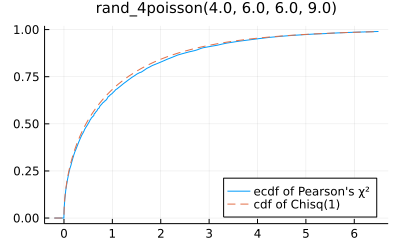

In [37]:
plot_pearson_chisq(rand_4poisson, 4, 6, 6, 9)

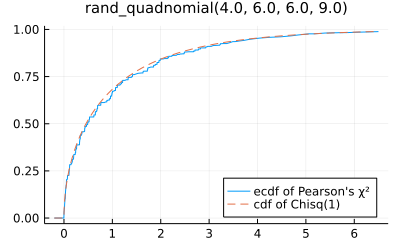

In [38]:
plot_pearson_chisq(rand_quadnomial, 4, 6, 6, 9)

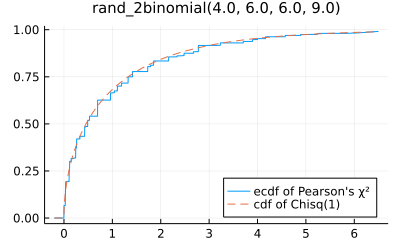

In [39]:
plot_pearson_chisq(rand_2binomial, 4, 6, 6, 9)

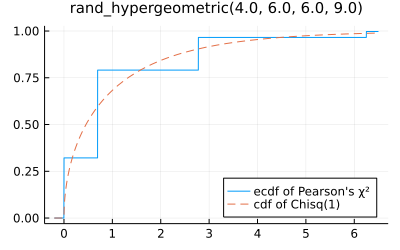

In [40]:
plot_pearson_chisq(rand_hypergeometric, 4, 6, 6, 9)

最後の超幾何分布の場合にのみ自由度 $1$ のχ²分布による近似が大幅に悪化することに注意せよ.  それ以外の場合にはχ²分布による近似の精度はかなりよいように見える.

## 尤度 (ゆうど)と推定

### 尤度に関するまとめ

「尤度」は「ゆうど」と読むが, 正しい読み方を知っても統計学的実践に関する有用な知見は得られない.

尤度の定義は __統計モデル内でデータと同じ数値が生成される確率もしくは確率の密度__ である.

尤度は統計モデルの「もっともらしさ」(尤もらしさ)の指標では __ない__. (尤度の英語名は「もっともらしさ」を意味する likelihood なのでこの点には注意を要する.)

尤度は「証拠の強さ」の指標でも __ない__. (尤度は証拠の強さの指標として不適切であるにもかかわらず, 歴史的な事情で evidence (証拠)という別名が付いているので, この点にも注意が必要である.)

尤度は __統計モデルのデータへの数値への適合度__(フィッティングの良さ)の指標の1つ(他にも沢山ある)として基本的かつ有用である.

尤度をそのような道具として使用することは, 統計モデルのデータの数値への適合度(フィッティングの良さ)をモデル内でデータと同じ数値がどれだけ生成され易いかで測ることを意味している.

尤度が高い(＝モデルがデータの数値によくフィットしている)にも関わらず役に立たない統計モデルを作ってしまうことはよくある.  そうなってしまうことを __オーバーフィッティング__ (overfitting, 過剰適合)という.

### 尤度函数と尤度の定義と諸注意

パラメータ $\theta = (\theta_1,\ldots,\theta_d)$ を持つ確率質量函数 $P(x|\theta)$ または確率密度函数 $p(x|\theta)$ が現実から取得するデータ(数値列) $x=(x_1,\ldots,x_n)$ の生成法則のモデル化になっているとき, それらを __統計モデル__ と呼ぶ.

データの数値 $x$ が得られたとき, パラメータ $\theta$ の函数 $\theta\mapsto P(x|\theta)$ または $\theta\mapsto p(x|\theta)$ をデータ $x$ に関する統計モデルの __尤度函数__ (ゆうどかんすう, likelihood function)と呼ぶ.

さらにパラメータの値 $\theta$ が与えられたとき, そこでの尤度函数の値 $P(x|\theta)$ または $p(x|\theta)$ を __尤度__ (ゆうど, likelihood)と呼ぶ.

すなわち, __統計モデル内においてデータ $x$ と同じ数値が生成される確率 $P(x|\theta)$ または確率の密度 $p(x|\theta)$ を尤度(ゆうど)と呼ぶ__.

尤度は __統計モデルのデータの数値への適合度の指標の1つ__(フィッティングの良さの指標の1つ, 他にも沢山ある)として使われる.

データの数値 $x$ が与えられたとき, 統計モデル $p(x|\theta)$ をデータの数値 $x$ に最も適合するようなパラメータ $\theta$ の値は, 尤度を適合度の指標として採用したとき, 尤度函数 $\theta \mapsto p(x|\theta)$ を最大化する $\theta = \hat\theta$ として得られる.

この方法を __最尤法__ (maximum likelihood method)と呼び, __最尤法の解__ $\hat\theta$ を __最尤推定値__ (maximum likelihood estimate)と呼び, $\theta=\hat\theta$ での尤度函数の値 $p(x|\hat\theta)$ をデータの数値 $x$ に関するモデルの __最大尤度__ と呼ぶ. 

実際の計算や理論的な取り扱いでは尤度函数そのものではなく, その対数である __対数尤度函数__ (log-likelihood function) $\theta\mapsto \log p(x|\theta)$ を使った方が便利なことが多い.  実際にはその $-1$ 倍の __負の対数尤度函数__ (negative log-likelihood function) $\theta \mapsto -\log p(x|\theta)$ が使われることが多い.  最尤法の解は負の対数尤度函数を最小化することによって得られる. (χ²分布との関係で $-1$ 倍ではなく, $-2$ 倍することも多い.)

__注意:__ 尤度(ゆうど)は英語では「もっともらしさ」(尤もらしさ)を意味する likelihood という単語で表されるが, 統計学における専門用語としての尤度は「もっともらしさ」と呼ぶには適さない量になっているので注意が必要である. (非常に残念なことに, 多くの教科書で「尤度はもっともらしさを意味する」のような誤誘導的な解説が書いてある.)

__注意:__ 尤度は「もっともらしさ」の指標としては不適切だが, 統計モデルのデータへの適合度(フィットの度合い)の指標の1つとして基本的かつ有用である.

__注意:__ 尤度函数 $\theta\mapsto P(x|\theta)$ または $\theta\mapsto p(x|\theta)$ は一般に $\theta$ の確率密度函数にはなっていない.

__注意:__ 「尤度函数は一般には確率密度函数ではない」を「尤度は確率ではない」と要約すると誤りになるので注意が必要である.  データ $x$ に関するパラメータ $\theta$ の離散分布モデルにおける尤度 $P(x|\theta)$ は確率の値になっている.

__注意:__ 繰り返しになるが, __尤度はモデルのデータへの適合度の指標の1つ__(他にも沢山ある)として基本的かつ有用である.

__注意:__ 尤度をデータへのモデルの適合度の指標として使うことは, モデルのデータへの適合度をモデル内でどれだけデータと同じ数値が生成され易いかでモデルのデータへの適合度を測るということになる.

__注意:__ データの数値を得てから, 後付けで統計モデルを作れば, いくらでも尤度の高い統計モデルを作れる. さらに, データの数値を見てから後付けで統計モデルを作らなくても, 事前に統計モデルに大量のパラメータを入れておけば, 後付けで採用しそうなモデルもその中に含まれているようにでき, 事前に決めておいた方法でパラメータをデータの数値に合わせて調節することによって, 統計モデルの尤度を高めることも可能である. 何らかの理由で尤度が高い(すなわち既知のデータへの適合度が高い)のにこれから得られるデータの予測に役に立たないモデルができてしまうことを __オーバーフィッティング__ (overfitting, 過剰適合)と呼ぶ.  過剰適合の問題があるので, 尤度を単純に「もっともらしさ」の指標として安易に採用することは危険である.

### 例: Bernoulli試行の尤度函数と最尤法

当たりが出る確率 $p$ が未知のルーレットを $n$ 回まわして得た当たりとはずれの長さ $n$ 列 $x_1,x_2,\ldots,x_n$ がデータとして得られる状況を考える.  当たりは $1$ ではずれは $0$ で表しておくことにする. 例えば, ルーレットを $n=5$ 回まわして, 当たり, はずれ, はずれ, 当たり, はずれが順に出たとき, $(x_1,x_2,x_3,x_4,x_5)=(1,0,0,1,0)$ となるとする.

その状況をBernoulli試行でモデル化する. すなわち, 次の確率質量函数を統計モデルとして採用する:

$$
P(x_1,\ldots,x_n|p) = p^{x_1+\cdots+x_n}(1 - p)^{n - (x_1+\cdots+x_n)}
\quad (x_i=1,0).
$$

このとき, データの数値 $(x_1,\ldots,x_n)$ が得られたとき, この統計モデルの尤度函数は

$$
L(p) = p^{x_1+\cdots+x_n}(1 - p)^{n - (x_1+\cdots+x_n)}
$$

になる.  これの右辺の式の形は上の確率質量函数と同じである. しかし, 尤度函数の側では $x_1,\ldots,x_n$ が具体的なデータの数値になっている点が異なる.

記号の簡単のため, データ $x_1,\ldots,x_n$ の中の当たり(=1)の個数を $k$ と書くことにする:

$$
k = x_1 + \cdots + x_n.
$$

このとき, 尤度函数は次のように書かれる:

$$
L(p) = p^k(1 - p)^{n-k}
$$

実際の計算では尤度函数そのものではなく, その対数である __対数尤度函数__ (log-likelihood function)

$$
\ell(p) = \log L(p) = k\log p + (n - k)\log(1 - p)
$$

の方が便利であることが多い.  実際にはさらにこれの $-1$ 倍(__負の対数尤度函数__ (negative log-likelihood function)

$$-
\ell(p) = - \log L(p) = -k\log p - (n - k)\log(1 - p)
$$

が使われることが多い. 最尤法の解は負の対数尤度函数を最小化することによって得られる. (χ²分布との関係で $-1$ 倍ではなく, $-2$ 倍することも多い.)

パラメータの値 $p$ の尤度 $L(p)$ もしくはその対数 $\log L(p)$ はBernoulli試行モデルのデータ $x_1,\ldots,x_n$ への適合度の指標の1つとみなされる.  だから, Bernoulli試行モデルのデータ $x_1,\ldots,x_n$ への適合度を最大化することは, 対数尤度 $\log L(p)$ を最大化するパラメータ値 $p$ を採用することに等しいと考えることができる. このようにしてモデルのパラメータを決定することを __最尤法__ (maximum likelihood method)や __最尤推定法__ (maximum likelihood estimation)と呼ぶ.  そして, そのようにして求めたパラメータ値を __最尤推定値__ (maximum likelihood esitimate, __最尤法の解__) と呼び, 最尤推定値における尤度函数の値を __最大尤度__ (maximum likelihood)と呼ぶ.  __この段落の定義はBernoulli試行モデル以外の場合にもそのまま一般化される.__

最尤法の解 $p = \hat{p}$ を求めてみよう.  そのために対数尤度函数を微分してみる:

$$
\ell'(p) = \frac{k}{p} - \frac{n-k}{1-p} = \frac{k-np}{p(1-p)}
$$

なので, $\ell'(p)$ は $p < k/n$ で正になり, $p > k/n$ で負になる.  ゆえに $\ell(p)$ は $p < k/n$ で単調増加し, $p > k/n$ で単調減少する.  ゆえに, 対数尤度函数 $\ell(p)$ を最大化する $p = \hat{p}$ は

$$
\hat{p} = \frac{k}{n}
$$

になる.  Bernoulli試行モデルの「$n$ 回中 $k$ 回が当たりが出た」というデータに関する尤度は成功確率パラメータの値を $p=\hat{p}=k/n$ としたときに最大になり, Bernoulli試行モデルがデータに最もよくフィットするようになる.

この結果を見て, 「$n$ 回中 $k$ 回が当たりが出た」というデータによれば, そのルーレットで当たりが出る確率は $k/n$ であるに違いないと推測することは __誤り__ である.  以上で行った計算は単にモデルがデータに最もよくフィットするパラメータ値を求めただけであり, データを生成したルーレットで当たりが出る確率を求めてはいない.

ルーレットを $n$ 回まわしたときに当たりが出る回数 $k$ は, ルーレットを $n$ 回まわす操作を行うごとに違う値になるだろう.  データは確率的に揺らぐ.  ルーレットで当たりが出る確率(これは未知)を適切に推測するためには, データの確率的揺らぎについても考慮する必要がある.  この点については様々な考え方があるが, 後で我々は区間推定(信頼区間)の考え方を学ぶことになるだろう.

### Bernoulli試行モデルの尤度函数の視覚化

前節で求めた「$n$ 回中当たりが $k$ 回出た」というデータに関するBernoulli試行モデルの尤度函数

$$
L(p) = p^k(1 - p)^{n-k}
$$

のグラフを描いてみよう.

しかし, 浮動小数点数での計算では $0<p<1$ を満たす $p$ の高次のべきは容易に $0$ になってしまう. そこで最大値が $1$ になるように定数をかけた次の函数のグラフをプロットすることにしよう:

$$
\frac{L(p)}{L(k/n)} = \left(\frac{p}{k/n}\right)^k \left(\frac{1-p}{1-k/n}\right)^{n-k}.
$$

In [41]:
function plot_berlik(n, k)
    if k < 0 || k > n
        return plot(; axis=false, tick=false, frame=false, margin=0Plots.mm)
    end
    L(p) = if 0 < p < 1
        exp(-(xlogy(k, safediv(k/n, p))+xlogy(n-k, safediv(1-k/n, 1-p))))
    else
        zero(p)
    end
    plot(L, -0.02, 1.02; label="", title="n=$n, k=$k")
    plot!(; xtick=0:0.1:1, tickfontsize=6)
end

plot_berlik (generic function with 1 method)

$n = 10$ を固定した場合

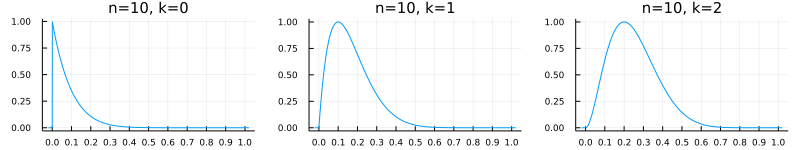

In [42]:
n = 10
plot(plot_berlik.(n,(0,1,2))...; size=(800,150), layout=(1,3))

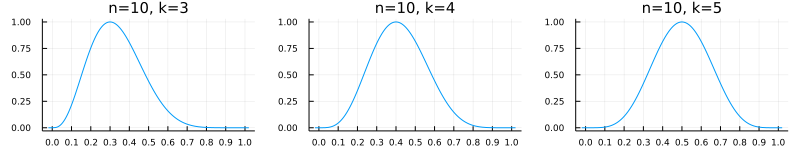

In [43]:
plot(plot_berlik.(n,(3,4,5))...; size=(800,150), layout=(1,3))

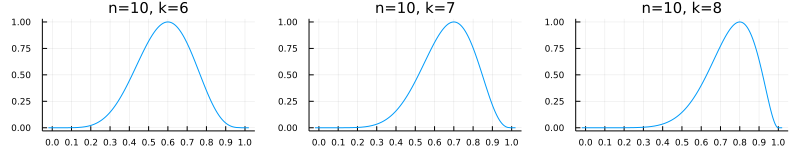

In [44]:
n = 10
plot(plot_berlik.(n,(6,7,8))...; size=(800,150), layout=(1,3))

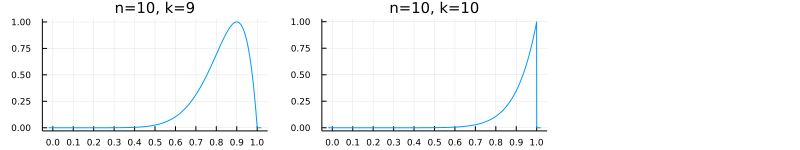

In [45]:
n = 10
plot(plot_berlik.(n,(9,10,11))...; size=(800,150), layout=(1,3))

$k/n$ を固定して $n$ を大きくした場合には, 尤度函数 $L(p)$ の台は $k/n$ に集中して行く.

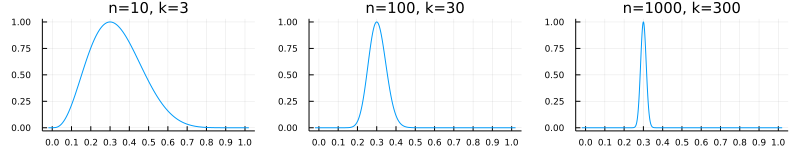

In [46]:
plot(plot_berlik.((10, 100, 1000), (3, 30, 300))...; size=(800,150), layout=(1,3))

このグラフから, データに基づくパラメータの推定において, パラメータの推定値としてどれだけの幅を持たせるかについて, 尤度函数がなにがしかの情報を持っていそうなこともわかる.

### 問題: 尤度が高くても全然もっともらしくない例(オーバーフィッティングの例)

データは当たり($1$ と書く)とはずれ($0$ と書く)がランダムに出るルーレットを $n$ 回まわして得た $1$ と $0$ の列 $x_1,x_2,\ldots,x_n$ として得られるとする.

統計モデルとして以下の2つを考える.

__モデル0:__ Bernoulli試行モデル: このモデルのパラメータ $0\le p\le 1$ を持つ確率質量函数は次のように書けるのであった:

$$
P_0(x_1,\ldots,x_n|p) = p^{x_1+\cdots+x_n}(1 - p)^{n-(x_1+\cdots+x_n)}
\quad (x_i=1,0).
$$

__モデル1:__ ルーレットをまわすごとに当たりが出る確率が変わってもよいと想定したモデル: このモデルは $n$ 個のパラメータ $0\le p_1,\ldots,p_n\le 1$ を持つ次の確率質量函数によって与えられる:

$$
P_1(x_1,\ldots,x_n|p_1,\ldots,p_n) =
\prod_{i=1}^n\left(p_i^{x_i}(1-p_i)^{1-x_i}\right)
\quad (x_i=1,0).
$$

データ($1$ と $0$ の列) $x_1,\ldots,x_n$ について, モデル0の最尤法の解 $p=\hat{p}$ は $\hat{p} = k/n$ ($k = x_1+\cdots+x_n$) になるのであった.  以下の2つを同時に示せ:

(1) モデル1の最尤法の解 $p_i = \hat{p}_i$ は $\hat{p}_i = x_i$ になる.

(2) どのようなデータ $x_1,x_2,\ldots,x_n$ についてもモデル1の最大尤度は離散分布モデルの場合に可能な最大の値 $1$ になる.

__注意:__ 確率と違って確率密度の値はいくらでも大きくなりえるので, 尤度が確率密度の値になる連続分布モデルにおいては尤度はいくらでも大きな値を取り得る.  離散分布モデルの場合には尤度は確率の値になるのでその最大値は $1$ になる.

__注意:__ この例はオーバーフィッティング(過剰適合)のシンプルな例になっている. パラメータの個数が多いモデルではオーバーフィッティングし易くなる.

__注意:__ この例を知っていれば, 「尤度が高ければもっともらしい」と考えることは単純に誤りであることがわかる.  尤度を常識的な意味でのもっともらしさと繋げるためには特別な条件が必要になる.

__解答例:__ モデル1において, データ $x_1,x_2,\ldots,x_n$ ($1$ と $0$ の列)について, $p_i=x_i$ とおくと, 

$$
x_i^{x_i}(1 - x_i)^{1-x_i} = 1
\quad (x_i=1,0)
$$

なので($0^0=1$ と約束しておく), その尤度は

$$
P_1(x_1,\ldots,x_n|x_1,\ldots,x_n) =
\prod_{i=1}^n\left(x_i^{x_i}(1-x_i)^{1-x_i}\right) = 1
$$

となり, 可能な最大の値になる.  ゆえに, 最尤推定値は $\hat{p}=x_i$ となる.

__解答終__

### 問題: 正規分布の標本分布モデルの尤度函数と最尤法

データは $n$ 個の実数達 $x_1,\ldots,x_n$ であるとし, 統計モデルとして平均 $\mu$, 分散 $\sigma^2$ の正規分布のサイズ $n$ の標本分布を考える. その統計モデルの確率密度函数 $p(x_1,\ldots,x_n|\mu,\sigma^2)$ は, 

$$
p(x_i|\mu,\sigma^2) =
\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right)
$$

とおくとき次のように表される:

$$
p(x_1,\ldots,x_n|\mu,\sigma^2) = \prod_{i=1}^n p(x_i|\mu,\sigma^2).
$$

データ $x_1,\ldots,x_n$ に関するこのモデルの尤度函数を最大化する $\mu=\hat\mu$, $\sigma^2=\hat\sigma^2$ はそれぞれ次になることを示せ:

$$
\hat\mu = \frac{1}{n}\sum_{i=1}^n x_i, \quad
\hat\sigma^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \hat\mu)^2.
$$

これは, 正規分布の標本分布モデルの最尤法の解が標本平均と(不偏にするための補正無しの)標本分散になることを意味している.

__注意:__ この結果はデータの標本平均と標本分散を求めることは, 正規分布の標本分布モデルがデータに最もよくフィットするような $\mu$ と $\sigma^2$ を求めることに等しいことがわかる.  この点は次の節の要約統計の説明でも触れる.

__解答例:__ 記号の簡単のため以下のように書くことにする:

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i, \quad
v^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2.
$$

このとき

$$
\begin{aligned}
\sum_{i=1}^n (x_i - \mu)^2 &=
\sum_{i=1}^n ((x_i - \bar{x}) - (\mu - \bar{x}))^2
\\ &=
\underbrace{\sum_{i=1}^n (x_i - \bar{x})^2}_{=nv^2} -
2(\mu - \bar{x})\underbrace{\sum_{i=1}^n(x_i - \bar{x})}_{=0} +
\sum_{i=1}^n (\mu - \bar{x})^2
\\ &=
n(v^2 + (\mu - \bar{x})^2)
\end{aligned}
$$

なので, 正規分布の標本分布の密度函数は以下のように表される:

$$
\begin{aligned}
p(x_1,\ldots,x_n|\mu,\sigma^2) &=
\frac{1}{(2\pi\sigma^2)^{n/2}}
\exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - \mu)^2 \right)
\\ &=
\frac{1}{(2\pi\sigma^2)^{n/2}}
\exp\left(-\frac{n}{2\sigma^2}(v^2 + (\mu - \bar{x})^2) \right).
\end{aligned}
$$

ゆえにデータ $x_1,\ldots,x_n$ に関するこれの尤度函数を $\ell(\mu,\sigma)$ と書くと,

$$
-\frac{2}{n}\ell(\mu, \sigma) =
\frac{(\mu - \bar{x})^2 + v^2}{\sigma^2} + \log\sigma^2 + \log(2\pi).
$$

これを最小化する $\mu=\hat\mu$ と $\sigma^2=\hat\sigma^2$ が $\hat\mu=\bar{x}$, $\hat\sigma^2=v^2$ となることを示せばよい.

$\sigma^2$ を固定するとき, 上の式を最小化する $\mu=\hat\mu$ が $\hat\mu = \bar{x}$ になることはすぐにわかる.

$\mu = \bar{x}$ のとき

$$
-\frac{2}{n}\ell(\bar{x}, \sigma) =
\frac{v^2}{\sigma^2} + \log\sigma^2 + \text{const.}
\tag{$\sharp$}
$$

右辺を $\sigma^2$ を1つの変数だとみなして, $\sigma^2$ で微分すると

$$ -
\frac{v^2}{(\sigma^2)^2} + \frac{1}{\sigma^2} =
\frac{\sigma^2 - v^2}{(\sigma^2)^2}
$$

であることから, これは $\sigma^2$ の函数として, $\sigma^2 < v_2$ のとき単調減少し, $\sigma^2 > v^2$ のとき単調増加するので, ($\sharp$)を最小化する $\sigma^2=\hat\sigma^2$ が $\hat\sigma^2=v^2$ であることがわかる.

__解答終__

### 正規分布の標本分布モデルの尤度函数の視覚化

値が大きな点ほど明るくプロットされるヒートマップによって正規分布の標本分布モデルの尤度函数をプロットしてみよう. 尤度函数を与えるためにはデータ $x_1,\ldots,x_n$ が必要になるが, データは簡単のため標準正規分布に従う乱数で生成することにする.

In [47]:
function plot_normallik(X, xlim, ylim; kwargs...)
    n = length(X)
    mle = fit_mle(Normal, X)
    μ̂, σ̂² = mean(mle), var(mle)
    f(μ, σ²) = exp(
        loglikelihood(Normal(μ, √σ²), X) -
        loglikelihood(Normal(μ̂, √σ̂²), X)
    )
    x = range(xlim..., 200)
    y = range(ylim..., 200)
    heatmap(x, y, f; colorbar=false)
    plot!(; xguide="μ", yguide="σ²", tickfontsize=7)
    title!("n = $n")
    plot!(; fmt=:png, size=(250, 250))
end

plot_normallik (generic function with 1 method)

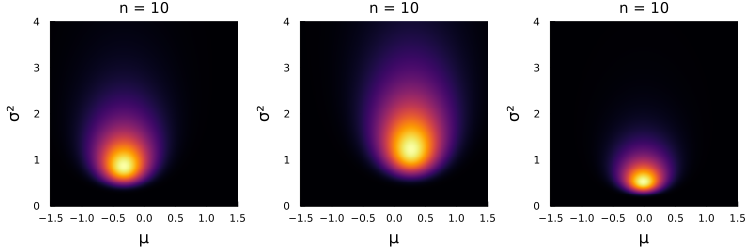

In [48]:
Random.seed!(4649373) # よろしくみなさん
plot((plot_normallik(randn(10), (-1.5, 1.5), (0, 4)) for _ in 1:3)...;
    size=(750,250), layout=(1,3), leftmargin=4Plots.mm, bottommargin=4Plots.mm)

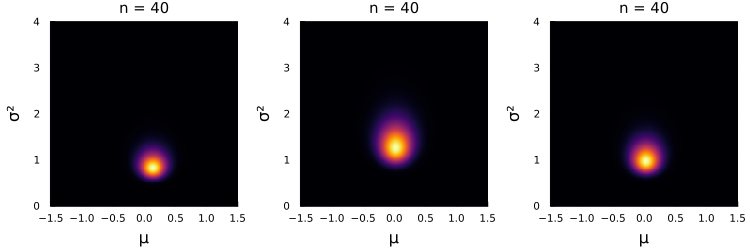

In [49]:
plot((plot_normallik(randn(40), (-1.5, 1.5), (0, 4)) for _ in 1:3)...;
    size=(750,250), layout=(1,3), leftmargin=4Plots.mm, bottommargin=4Plots.mm)

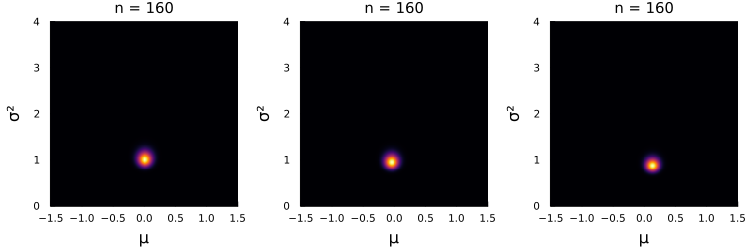

In [50]:
plot((plot_normallik(randn(160), (-1.5, 1.5), (0, 4)) for _ in 1:3)...;
    size=(750,250), layout=(1,3), leftmargin=4Plots.mm, bottommargin=4Plots.mm)

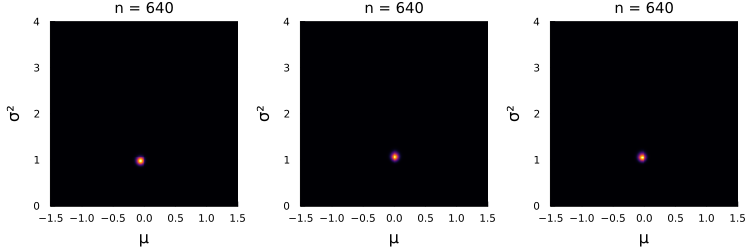

In [51]:
plot((plot_normallik(randn(640), (-1.5, 1.5), (0, 4)) for _ in 1:3)...;
    size=(750,250), layout=(1,3), leftmargin=4Plots.mm, bottommargin=4Plots.mm)

$n$ を大きくすると, サンプルを生成した分布の期待値と分散の値の近くに尤度函数の台が集中して行く.

以下はサンプルを生成する分布を正規分布とは大きく違う指数分布にした場合

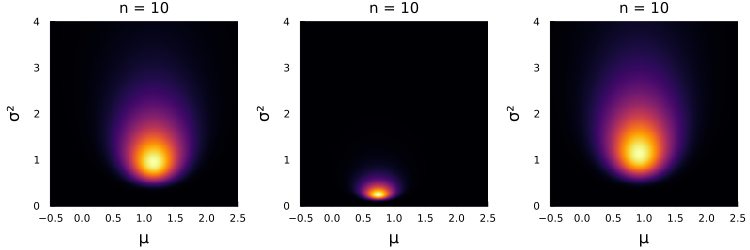

In [52]:
Random.seed!(4649373) # よろしくみなさん
plot((plot_normallik(rand(Exponential(), 10), (-0.5, 2.5), (0, 4)) for _ in 1:3)...;
    size=(750,250), layout=(1,3), leftmargin=4Plots.mm, bottommargin=4Plots.mm)

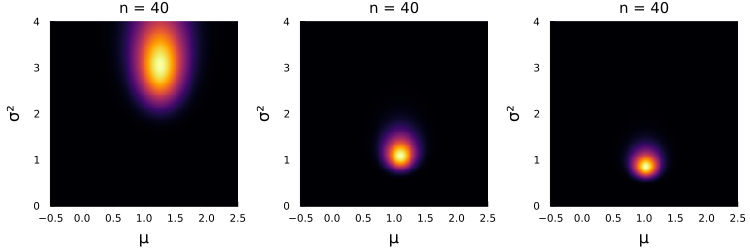

In [53]:
plot((plot_normallik(rand(Exponential(), 40), (-0.5, 2.5), (0, 4)) for _ in 1:3)...;
    size=(750,250), layout=(1,3), leftmargin=4Plots.mm, bottommargin=4Plots.mm)

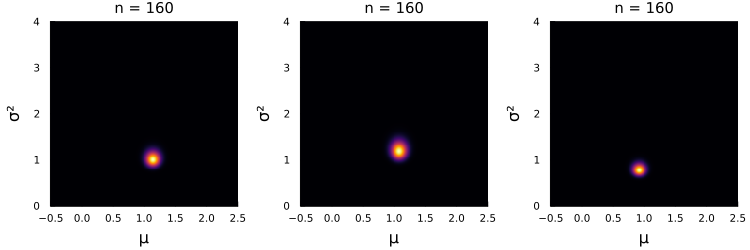

In [54]:
plot((plot_normallik(rand(Exponential(), 160), (-0.5, 2.5), (0, 4)) for _ in 1:3)...;
    size=(750,250), layout=(1,3), leftmargin=4Plots.mm, bottommargin=4Plots.mm)

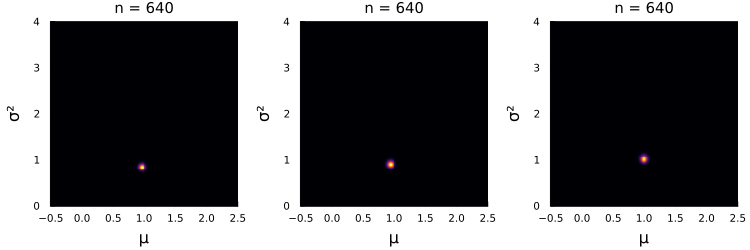

In [55]:
plot((plot_normallik(rand(Exponential(), 640), (-0.5, 2.5), (0, 4)) for _ in 1:3)...;
    size=(750,250), layout=(1,3), leftmargin=4Plots.mm, bottommargin=4Plots.mm)

### 問題: 最小二乗法がある種の正規分布モデルの最尤法に一致すること

データは2つの実数の組が $n$ 個 $(x_1, y_1), \ldots, (x_n, y_n)$ の形式であるとし, 記号の簡単のために次のようにおく:

$$
\begin{aligned}
&
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i, \quad
v_x^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2,
\\ &
\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i, \quad
v_y^2 = \frac{1}{n}\sum_{i=1}^n (y_i - \bar{y})^2, \quad
v_{xy} = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}).
\end{aligned}
$$

統計モデルとして, パラメータ $x_1,\ldots,x_n,\alpha,\beta$ と $\sigma^2>0$ を持つ次の確率密度函数で定まる $y_1,\ldots,y_n$ に関する確率分布を考える:

$$
p(y_1,\ldots,y_n|x_1,\ldots,x_n,\alpha,\beta,\sigma^2) =
\frac{1}{(2\pi\sigma^2)^{n/2}}
\exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i - (\alpha + \beta x_i))^2\right).
$$

このモデルのデータ $(x_1, y_1), \ldots, (x_n, y_n)$ に関する尤度函数

$$
L(\alpha,\beta,\sigma^2) =
\frac{1}{(2\pi\sigma^2)^{n/2}}
\exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i - (\alpha + \beta x_i))^2\right)
$$

を最大化する $\alpha=\hat\alpha$, $\beta=\hat\beta$, $\sigma^2=\hat\sigma^2$ は次になることを示せ:

$$
\hat\beta = \frac{v_{xy}}{v_x^2}, \quad
\hat\alpha = \bar{y} - \hat\beta \bar{x}, \quad
\hat\sigma^2 = \frac{v_x^2 v_y^2 - v_{xy}^2}{v_x^2}.
$$

__注意:__ この公式は最小二乗法の公式と一致する.

__解答例:__ 尤度函数の形を整理し直そう.

$$
\begin{aligned}
(y_i - (\alpha + \beta x_i))^2 &=
(y_i - \bar{y} + \bar{y} - (\alpha + \beta\bar{x}) + (\alpha + \beta\bar{x}) - (\alpha + \beta x_i))^2
\\ &=
((y_i - \bar{y}) - \beta(x_i - \bar{x}) + (\bar{y} - (\alpha + \beta\bar{x})))^2
\\ &=
\beta^2(x_i - \bar{x})^2 -
2\beta(x_i - \bar{x})(y_i - \bar{y}) +
(y_i - \bar{y})^2
\\ &+
(\bar{y} - (\alpha + \beta\bar{x}))^2 +
2(y_i - \bar{y})(\bar{y} - (\alpha + \beta\bar{x})) -
2\beta(x_i - \bar{x})(\bar{y} - (\alpha + \beta\bar{x}))
\end{aligned}
$$

より

$$
\begin{aligned}
\frac{1}{n}\sum_{i=1}^n (y_i - (\alpha + \beta x_i))^2 &=
v_x^2\beta^2 - 2v_{xy}\beta + v_y^2 + (\bar{y} - (\alpha + \beta\bar{x}))^2
\\ &=
v_x^2\left(\beta - \frac{v_{xy}}{v_x^2}\right)^2 +
\frac{v_x^2 v_y^2 - v_{xy}^2}{v_x^2} +
(\bar{y} - (\alpha + \beta\bar{x}))^2.
\end{aligned}
$$

ゆえに, 尤度函数の対数の $-2/n$ 倍を $f(\alpha,\beta,\sigma^2)$ と書くと,

$$
\begin{aligned}
&
f(\alpha,\beta,\sigma^2) = -\frac{2}{n}\log L(\alpha,\beta,\sigma^2)
\\ &=
\frac{1}{\sigma^2}\left(
v_x^2\left(\beta - \frac{v_{xy}}{v_x^2}\right)^2 +
\frac{v_x^2 v_y^2 - v_{xy}^2}{v_x^2} +
(\bar{y} - (\alpha + \beta\bar{x}))^2
\right) + \log\sigma^2 + \log(2\pi).
\end{aligned}
$$

これを最小化する $\alpha=\hat\alpha$, $\beta=\hat\beta$, $\sigma^2=\hat\sigma^2$ が

$$
\hat\beta = \frac{v_{xy}}{v_x^2}, \quad
\hat\alpha = \bar{y} - \hat\beta \bar{x}, \quad
\hat\sigma^2 = \frac{v_x^2 v_y^2 - v_{xy}^2}{v_x^2}.
$$

になることを示せばよい. $\sigma^2$ を固定したとき, $f(\alpha,\beta,\sigma^2)$ を最小化する $\alpha=\hat\alpha$, $\beta=\hat\beta$ が

$$
\hat\beta = \frac{v_{xy}}{v_x^2}, \quad
\hat\alpha = \bar{y} - \hat\beta \bar{x}
$$

になることはすぐにわかる.  このとき

$$
f(\hat\alpha,\hat\beta,\sigma^2) =
\frac{1}{\sigma^2}\frac{v_x^2 v_y^2 - v_{xy}^2}{v_x^2} +
\log\sigma^2 + \log(2\pi)
$$

であり, 前節と同様に $\sigma^2$ を1つの変数だとみなして $\sigma^2$ で微分することによって, これを最小化する $\sigma^2=\hat\sigma^2$ が

$$
\hat\sigma^2 = \frac{v_x^2 v_y^2 - v_{xy}^2}{v_x^2}
$$

になることがわかる.

__解答終__

### 最尤法の観点から見た十分統計量

$p(x|\theta)$ はパラメータ $\theta$ を持つ $x$ に関する確率密度函数であるとする(確率質量函数の場合も同様である).  $p(x|\theta)$ をデータ $x$ に関する統計モデルの密度函数である場合について考える.

このとき, Fiher-Neymanの分解定理より, $x$ の函数 $t(x)$ が __十分統計量__ (sufficient statistic)であることと, モデルの密度函数が $0$ 以上の値を持つ函数たち $a(x)$, $b(t|\theta)$ によって

$$
p(x|\theta) = a(x)b(t(x)|\theta)
$$

と表されることは同値である.  すなわちこの条件を十分統計量の定義として採用してもよい.  この条件はデータ $x$ の尤度函数

$$
L(\theta) = a(x)b(t(x)|\theta)
$$

が $\theta$ に関する定数 $a(x)$ 倍の違いを除けば, $t(x)$ と $\theta$ だけで尤度函数が表されることと同値である. 尤度 $L(\theta)$ を最大化することと $b(t(x)|\theta)$ を最大化することは同値なので, 最尤法の解は, データ $x$ そのものの値ではなく, データ $x$ から計算される $t(x)$ の値だけで決まることになる. 

十分統計量はデータの要約を与えるためにも有用である.

#### Bernoulli試行モデルの十分統計量

Bernoulli試行モデルのパラメータ $p$ を持つ確率質量函数は

$$
P(x_1,\ldots,x_n|p) = p^{x_1+\cdots+x_n}(1 - p)^{n - (x_1+\cdots+x_n)}
\quad (x_i=1,0).
$$

と書けるので, 

$$
t(x_1,\ldots,x_n) = x_1+\cdots+x_n
$$

は十分統計量になっている. $x_1,\ldots,x_n$ そのものの情報を忘れても, $k=x_1+\cdots+x_n$ の情報さえあれば最尤法を実行できる.

#### 正規分布の標本分布モデルの十分統計量

正規分布の標本分布モデルのパラメータ $\mu,\sigma^2$ を持つ確率密度函数は

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i, \quad
v^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2
$$

とおくと,

$$
p(x_1,\ldots,x_n|\mu,\sigma^2) =
\frac{1}{(2\pi\sigma^2)^{n/2}}
\exp\left(-\frac{n}{2\sigma^2}(v^2 + (\mu - \bar{x})^2) \right)
$$

と書けるので,

$$
t(x_1,\ldots,x_n) = (\bar{x}, v^2) =
\left(\frac{1}{n}\sum_{i=1}^n x_i, \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2\right)
$$

は十分統計量になっている. すなわち, 標本平均と標本分散の組み合わせは正規分布の標本分布モデルの十分統計量になっている. 補正無しの標本分散 $v^2$ を不偏分散 $s^2=(n/(n-1))v^2$ で置き換えても十分統計量のままである.

#### 最小二乗法を与える正規分布モデルの尤度函数を記述する統計量

最小二乗法を与える正規分布モデルのパラメータ $x_1,\ldots,x_n,\alpha,\beta,\sigma^2$ を持つ確率密度函数は

$$
\begin{aligned}
&
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i, \quad
v_x^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2,
\\ &
\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i, \quad
v_y^2 = \frac{1}{n}\sum_{i=1}^n (y_i - \bar{y})^2, \quad
v_{xy} = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}).
\end{aligned}
$$

とおくと,

$$
\begin{aligned}
&
p(y_1,\ldots,y_n|x_1,\ldots,x_n,\alpha,\beta,\sigma^2)
\\ &=
\frac{1}{(2\pi\sigma^2)^{n/2}}
\exp\left(
-\frac{n}{2\sigma^2}\left(
v_x^2\beta^2 - 2v_{xy}\beta + v_y^2 + (\bar{y} - (\alpha + \beta\bar{x}))^2
\right)
\right)
\\ &=
\frac{1}{(2\pi\sigma^2)^{n/2}}
\exp\left(
-\frac{n}{2\sigma^2}\left(
v_x^2\left(\beta - \frac{v_{xy}}{v_x^2}\right)^2 +
\frac{v_x^2 v_y^2 - v_{xy}^2}{v_x^2} +
(\bar{y} - (\alpha + \beta\bar{x}))^2
\right)
\right)
\end{aligned}
$$

と書けるので, 

$$
t(y_1,\ldots,y_n|x_1,\ldots,x_n) = (\bar{x}, \bar{y}, v_x^2, v_y^2, v_{xy})
$$

は少し拡張した意味での十分統計量だと言ってよいだろう.

__注意:__ $(\bar{x}, \bar{y}, v_x^2, v_y^2, v_{xy})$ は2変量正規分布の標本分布モデルの十分統計量になっている.

## 記述統計 (要約統計)

$x_1,\ldots,x_n$ の形式のデータや $(x_1,y_1),\ldots,(x_n,y_n)$ の形式のデータが得られたとき, それらの情報を要約するためによく使われる量がある.

それらについて簡単にまとめておこう.

### $n$ 個の $1$ と $0$ からなるデータ $x_1,\ldots,x_n$ の要約

$n$ 個の $1$ と $0$ からなるデータ $x_1,\ldots,x_n$ の要約として, $x_1,\ldots,x_n$ の中の $1$ の個数 $k=x_1+\cdots+x_n$ がよく使われる. 報告の形式は「$n$ 個中 $k$ 個が $1$ である」になる. その $k$ はBernoulli試行モデルの十分統計量になっているのであった.

そのようなデータの要約の仕方は $x_1,\ldots,x_n$ が並んでいる順序が重要な場合には適さない.

「$n$ 個中の $k$ 個が $1$ である」と報告するときには $n$ と $k$ の両方の数値を報告することが重要である. なぜならばデータのサイズ $n$ は統計分析の精度を見積もる上で非常に重要な情報だからである.

$n$ の情報を省いて「$1$ の割合は $30\%$ であった」のように $k/n$ の情報だけを伝えることは好ましくない.

### より一般の離散的なデータの要約

$n$ 個の $1,2,\ldots,r$ からなるデータ $x_1,\ldots,x_n$ の要約として, $x_1,\ldots,x_n$ の中含まれる $a=1,2,\ldots,r$ の個数 $k_a$ がまとめた $(k_1,\ldots,k_r)$ がよく使われる.  ($(k_1,\ldots,k_r)$ はカテゴリカル分布の標本分布モデルの十分統計量になっている.)

そのようなデータの要約の仕方は $x_1,\ldots,x_n$ が並んでいる順序が重要な場合には適さない.

データの要約(summary)を報告する場合には, 必ずデータのサイズがわかるように報告しなければいけない. なぜならばデータのサイズ $n$ は統計分析の精度を見積もる上で非常に重要な情報だからである.

例えば「$1,2,3,4$ の割合がそれぞれ $10\%, 20\%, 30\%, 40\%$ であった」のように $k_a/n$ の情報だけを伝えることは好ましくない.  全体の割合の情報だけではなく, 全体の個数の情報も必ず報告しなければいけない. 

### $n$ 個の実数からなるデータ $x_1,\ldots,x_n$ の要約

$n$ 個の実数からなるデータ $x_1,\ldots,x_n$ の要約としては以下がよく使われている:

* 標本平均 $\bar{x}$ と不偏分散 $s^2$
* 中央値
* 四分位数

標本平均と不偏分散の組み合わせは正規分布の標本分布モデルの十分統計量になっており, それだけではなく, その最尤法の解にもなっているのであった.

標本平均だけではなく, 中央値の情報も報告されているとき, それらに大きなずれが存在するならば, 分布に非対称性があることもわかる.

四分位数は外れ値がある場合の分布の散らばり方の要約として頑健である.

以上で挙げた, 標本平均, 不偏分散, 中央値, 四分位数はデータの分布が単峰型の場合にはデータの要約の仕方として適切だが, 山が2以上ある分布の場合には適さない.

この型のデータの様子は, ヒストグラムや経験累積分布函数($x$ に $x$ 以下の $x_i$ 達の割合を対応させる函数)をプロットして, __データ全体の様子を視覚的に必ず確認した方がよい.__

### $n$ 個の実数の対からなるデータ $(x_1,y_1),\ldots,(x_n,y_n)$ の要約

$n$ 個の実数の対からなるデータ $(x_1,y_1),\ldots,(x_n,y_n)$ の要約としてよく使われているのは,

* 標本平均 $\bar{x},\bar{y}$ と不偏分散と不偏共分散 $s_x^2, s_y^2, s_{xy}$

である.　この5つの量を合わせたものは二変量正規分布の標本分布モデルの十分統計量になっている.

それらの統計量を使って線形回帰の結果を表示することもできる.  線形回帰もデータの要約の仕方だとみなされる.

このようなデータを取得する場合には $x_i$ と $y_i$ のあいだの関係がどうなっているかに興味がある.

そのときに上の5つの要約統計量(や線形回帰の結果)だけしか見ないと, $x_i$ と $y_i$ のあいだの重要な関係を見逃してしまうことがある.

この型のデータを扱う場合には, __散布図__ (scatter plot)を描くなどして、__データ全体の様子を視覚的に必ず確認した方がよい.__

### Anscombeの例(アンスコムの例, 再)

以下の散布図(scatter plot)を見れば, 要約統計量だけを見てはいけないことがわかる.

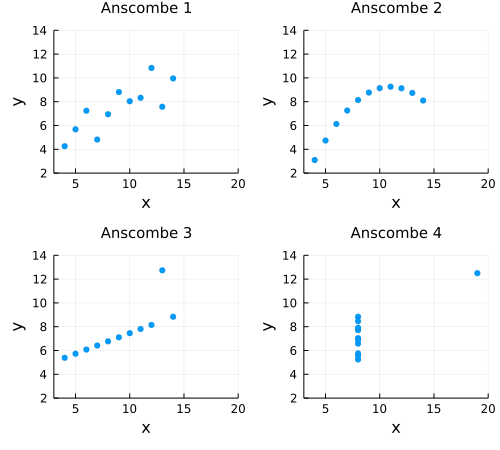

In [56]:
using RDatasets
anscombe = dataset("datasets", "anscombe")

SA1 = scatter(anscombe.X1, anscombe.Y1; title="Anscombe 1", label="", msw=0)
SA2 = scatter(anscombe.X2, anscombe.Y2; title="Anscombe 2", label="", msw=0)
SA3 = scatter(anscombe.X3, anscombe.Y3; title="Anscombe 3", label="", msw=0)
SA4 = scatter(anscombe.X4, anscombe.Y4; title="Anscombe 4", label="", msw=0)
plot(SA1, SA2, SA3, SA4; size=(500, 450), layout=(2,2),
    xlim=(3, 20), ylim=(2, 14), xlabel="x", ylabel="y")

---------- Anscombe 1
x̄ = mean(x) = 9.0
ȳ = mean(y) = 7.500909090909093
sx² = var(x) = 11.0
sy² = var(y) = 4.127269090909091
sxy = cov(x, y) = 5.501
α̂ = 3.0000909090909103
β̂ = 0.5000909090909091
σ̂ = 1.1129429904536887

---------- Anscombe 2
x̄ = mean(x) = 9.0
ȳ = mean(y) = 7.500909090909091
sx² = var(x) = 11.0
sy² = var(y) = 4.127629090909091
sxy = cov(x, y) = 5.5
α̂ = 3.000909090909091
β̂ = 0.5
σ̂ = 1.1134927848074192

---------- Anscombe 3
x̄ = mean(x) = 9.0
ȳ = mean(y) = 7.500000000000001
sx² = var(x) = 11.0
sy² = var(y) = 4.12262
sxy = cov(x, y) = 5.497
α̂ = 3.0024545454545466
β̂ = 0.49972727272727274
σ̂ = 1.1126802162509963

---------- Anscombe 4
x̄ = mean(x) = 9.0
ȳ = mean(y) = 7.50090909090909
sx² = var(x) = 11.0
sy² = var(y) = 4.12324909090909
sxy = cov(x, y) = 5.499
α̂ = 3.0017272727272726
β̂ = 0.49990909090909086
σ̂ = 1.112125937113239


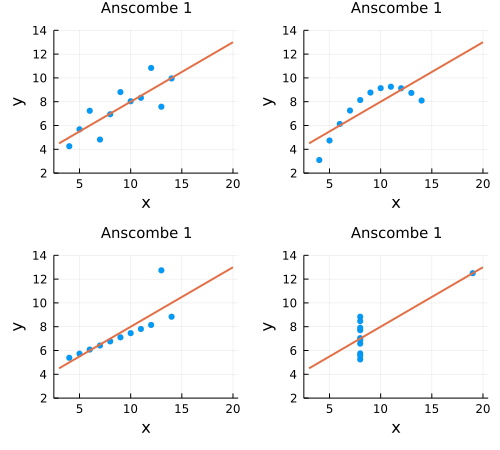

In [57]:
function plot_ols(x, y, α̂, β̂; xlim=nothing,
        title="data and regression line", kwargs...)
    a, b = extrema(x)
    isnothing(xlim) && (xlim = (a - 0.1(b-a), b + 0.1(b-a)))
    scatter(x, y; label="", msw=0)
    plot!(x -> α̂ + β̂*x, xlim...; label="", lw=2)
    plot!(; xlabel="x", ylabel="y", msw=0)
    plot!(; size=(400, 300))
    plot!(; title, kwargs...)
end

function solve_anscombe(x, y;
        title="", xlim=(3, 20), ylim=(2, 14), size=(250, 225))
    @show x̄ = mean(x)
    @show ȳ = mean(y)
    @show sx² = var(x)
    @show sy² = var(y)
    @show sxy = cov(x, y)
    β̂ = sxy/sx²
    α̂ = ȳ - β̂*x̄
    σ̂ = √((n - 1)/n*(sx²*sy² - sxy^2)/sx²)
    @show α̂ β̂ σ̂
    
    plot_ols(x, y, α̂, β̂; title, xlim, ylim, size)
end

println("---------- Anscombe 1")
PA1 = solve_anscombe(anscombe.X1, anscombe.Y1, title="Anscombe 1")
println("\n---------- Anscombe 2")
PA2 = solve_anscombe(anscombe.X2, anscombe.Y2, title="Anscombe 1")
println("\n---------- Anscombe 3")
PA3 = solve_anscombe(anscombe.X3, anscombe.Y3, title="Anscombe 1")
println("\n---------- Anscombe 4")
PA4 = solve_anscombe(anscombe.X4, anscombe.Y4, title="Anscombe 1")

plot(PA1, PA2, PA3, PA4; size=(500, 450), layout=(2,2))

### 問題: DataSaurusの例

以下のデータは

* http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html

から取得したものである. 

* [CSVファイル](https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/data/Datasaurus_data.csv)
* [x座標のみ](https://github.com/genkuroki/Statistics/blob/master/2022/data/Datasaurus_X.txt), [y座標のみ](https://github.com/genkuroki/Statistics/blob/master/2022/data/Datasaurus_Y.txt)
* [x座標のみコンマ付き](https://github.com/genkuroki/Statistics/blob/master/2022/data/Datasaurus_X_with_commas.txt), [y座標のみコンマ付き](https://github.com/genkuroki/Statistics/blob/master/2022/data/Datasaurus_Y_with_commas.txt)

以下のデータの左列はx座標のデータであり, 右列はy座標のデータである.

(1) 標本平均 $\bar{x}$, $\bar{y}$ と不偏分散と不偏共分散 $s_x^2$, $s_y^2$, $s_{xy}$ を小数点以下2桁以上求めよ.

(2) 何らかの方法で散布図(scatter plot)を描け.

さらに datasaurus same stats についてインターネットで検索して統計分析で注意するべきことを学べるサイトを見つけて内容を理解するように努力せよ.

__ヒント:__ (1),(2)についてはインターネット上で適切に検索すれば以上の問題を解くことができるサイトを発見できる.

In [58]:
datasaurus = [
    55.3846 97.1795
    51.5385 96.0256
    46.1538 94.4872
    42.8205 91.4103
    40.7692 88.3333
    38.7179 84.8718
    35.6410 79.8718
    33.0769 77.5641
    28.9744 74.4872
    26.1538 71.4103
    23.0769 66.4103
    22.3077 61.7949
    22.3077 57.1795
    23.3333 52.9487
    25.8974 51.0256
    29.4872 51.0256
    32.8205 51.0256
    35.3846 51.4103
    40.2564 51.4103
    44.1026 52.9487
    46.6667 54.1026
    50.0000 55.2564
    53.0769 55.6410
    56.6667 56.0256
    59.2308 57.9487
    61.2821 62.1795
    61.5385 66.4103
    61.7949 69.1026
    57.4359 55.2564
    54.8718 49.8718
    52.5641 46.0256
    48.2051 38.3333
    49.4872 42.1795
    51.0256 44.1026
    45.3846 36.4103
    42.8205 32.5641
    38.7179 31.4103
    35.1282 30.2564
    32.5641 32.1795
    30.0000 36.7949
    33.5897 41.4103
    36.6667 45.6410
    38.2051 49.1026
    29.7436 36.0256
    29.7436 32.1795
    30.0000 29.1026
    32.0513 26.7949
    35.8974 25.2564
    41.0256 25.2564
    44.1026 25.6410
    47.1795 28.7180
    49.4872 31.4103
    51.5385 34.8718
    53.5897 37.5641
    55.1282 40.6410
    56.6667 42.1795
    59.2308 44.4872
    62.3077 46.0256
    64.8718 46.7949
    67.9487 47.9487
    70.5128 53.7180
    71.5385 60.6410
    71.5385 64.4872
    69.4872 69.4872
    46.9231 79.8718
    48.2051 84.1026
    50.0000 85.2564
    53.0769 85.2564
    55.3846 86.0256
    56.6667 86.0256
    56.1538 82.9487
    53.8462 80.6410
    51.2821 78.7180
    50.0000 78.7180
    47.9487 77.5641
    29.7436 59.8718
    29.7436 62.1795
    31.2821 62.5641
    57.9487 99.4872
    61.7949 99.1026
    64.8718 97.5641
    68.4615 94.1026
    70.7692 91.0256
    72.0513 86.4103
    73.8462 83.3333
    75.1282 79.1026
    76.6667 75.2564
    77.6923 71.4103
    79.7436 66.7949
    81.7949 60.2564
    83.3333 55.2564
    85.1282 51.4103
    86.4103 47.5641
    87.9487 46.0256
    89.4872 42.5641
    93.3333 39.8718
    95.3846 36.7949
    98.2051 33.7180
    56.6667 40.6410
    59.2308 38.3333
    60.7692 33.7180
    63.0769 29.1026
    64.1026 25.2564
    64.3590 24.1026
    74.3590 22.9487
    71.2821 22.9487
    67.9487 22.1795
    65.8974 20.2564
    63.0769 19.1026
    61.2821 19.1026
    58.7179 18.3333
    55.1282 18.3333
    52.3077 18.3333
    49.7436 17.5641
    47.4359 16.0256
    44.8718 13.7180
    48.7179 14.8718
    51.2821 14.8718
    54.1026 14.8718
    56.1538 14.1026
    52.0513 12.5641
    48.7179 11.0256
    47.1795  9.8718
    46.1538  6.0256
    50.5128  9.4872
    53.8462 10.2564
    57.4359 10.2564
    60.0000 10.6410
    64.1026 10.6410
    66.9231 10.6410
    71.2821 10.6410
    74.3590 10.6410
    78.2051 10.6410
    67.9487  8.7180
    68.4615  5.2564
    68.2051  2.9487
    37.6923 25.7692
    39.4872 25.3846
    91.2821 41.5385
    50.0000 95.7692
    47.9487 95.0000
    44.1026 92.6923
];

__注意:__ この例についての詳しい解説が

* Justin Matejka, George Fitzmaurice. Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing. Honourable Mention, ACM SIGCHI Conference on Human Factors in Computing Systems, 2017 \[[link](https://www.autodesk.com/research/publications/same-stats-different-graphs)\]

にある.  この解説は非常に面白い.  データ全体の様子がわかるようなグラフを作成することが統計分析では必須なことがよくわかる解説になっている.

このサイトは "datasaurus same stats" をインターネットで検索すればすぐに見つかる.

#### Julia言語を使う解答例

In [59]:
# (1)
x, y = datasaurus[:,1], datasaurus[:,2]
@show x̄ = mean(x)
@show ȳ = mean(y)
@show sx² = var(x)
@show sy² = var(y)
@show sxy = cov(x,y);

x̄ = mean(x) = 54.26327323943663
ȳ = mean(y) = 47.832252816901395
sx² = var(x) = 281.06998759176105
sy² = var(y) = 725.5159610042119
sxy = cov(x, y) = -29.11393267347017


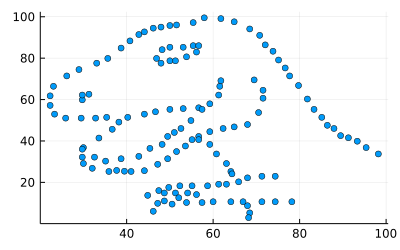

In [60]:
# (2)
scatter(x, y; label="", tirle="Datasaurus")

こんなことになっていることは要約統計量たちを眺めてもわからない!

データを得たら, 必ず全体の様子を何らかの視覚化によって確認しなければいけない.

これは絶対に必要なことである.

#### Julia言語の使い方

(1) https://julialang.org/downloads/ から current stable release のインストーラをダウンロードして公式バイナリをパソコンに入れる.

(2) juliaを起動して, 適当にコードを打ち込んで計算できることを確認する.

```
julia> sinpi(1/6)
0.5
```

(3) 以下を実行して[Plots.jlパッケージ](https://github.com/JuliaPlots/Plots.jl)をJuliaの環境に入れる.

```
julia> ]
pkg> add Plots
ここにインストールの様子が表示される.
pkg> ここでバックスペースキーを押す.
julia> 
```

(4) 以下を実行して, パッケージを読み込む.

```
julia> using Statistics
julia> using Plots
```

(4) `datasaurus = [ ... ]` のセルの内容を `julia> ` と表示されている画面にコピー＆ペーストする.

(5) 以下を順次実行する.

```
julia> x, y = datasaurus[:,1], datasaurus[:,2]
julia> mean(x)
julia> mean(y)
julia> var(x)
julia> var(y)
julia> cov(x,y)
```

これで問題の(1)の答えが得られる.

(6) 次を実行すれば問題(2)の答えが得られる.

```
julia> scatter(x, y)
```

__注意:__ 複雑な計算を十分にできるソフトを自分のパソコンに入れておいた方がよい. もちろんそれはJulia言語である必要はない. 統計学を学習するという目的のためにはR言語やPython言語もお勧めである.

#### インターネット上の各種計算サイトを使う方法

[jp.foxcalculators.com](https://jp.foxcalculators.com/)と[keisan.casio.jp](https://keisan.casio.jp)を利用してみよう.

(1) 平均と不偏分散と不偏共分散は[jp.foxcalculators.comの共分散計算機](https://jp.foxcalculators.com/math/3003.html)で計算できる.  データの入力は

* [x座標のみコンマ付き](https://github.com/genkuroki/Statistics/blob/master/2022/data/Datasaurus_X_with_commas.txt), [y座標のみコンマ付き](https://github.com/genkuroki/Statistics/blob/master/2022/data/Datasaurus_Y_with_commas.txt)

からコピー＆ペーストすればよい.  不偏分散が不偏共分散の特別な場合であることに注意せよ. ($x_i$ と $x_i$ の不偏共分散は $x_i$ の不偏分散になる.)

* $\bar{x} \approx 54.263$
* $s_x^2 \approx 281.07$

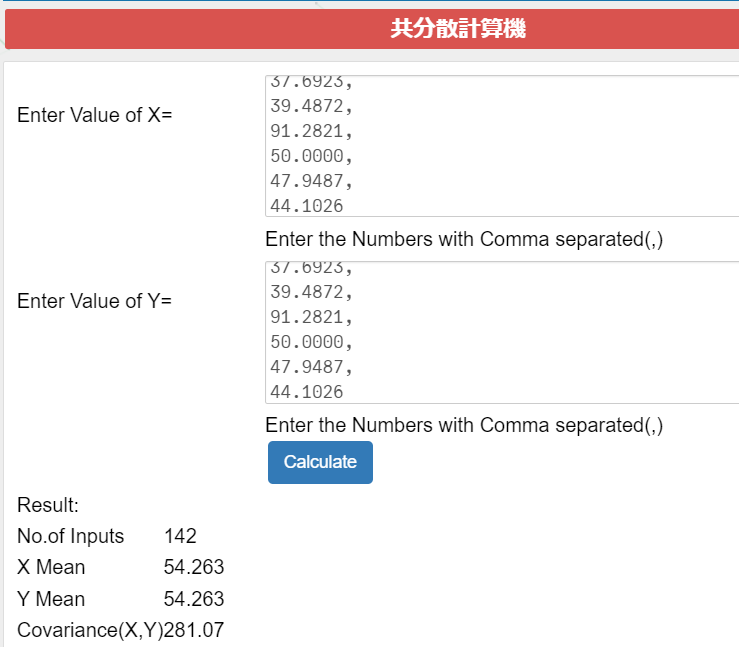

* $\bar{y} \approx 47.832$
* $s_y^2 \approx 725.516$

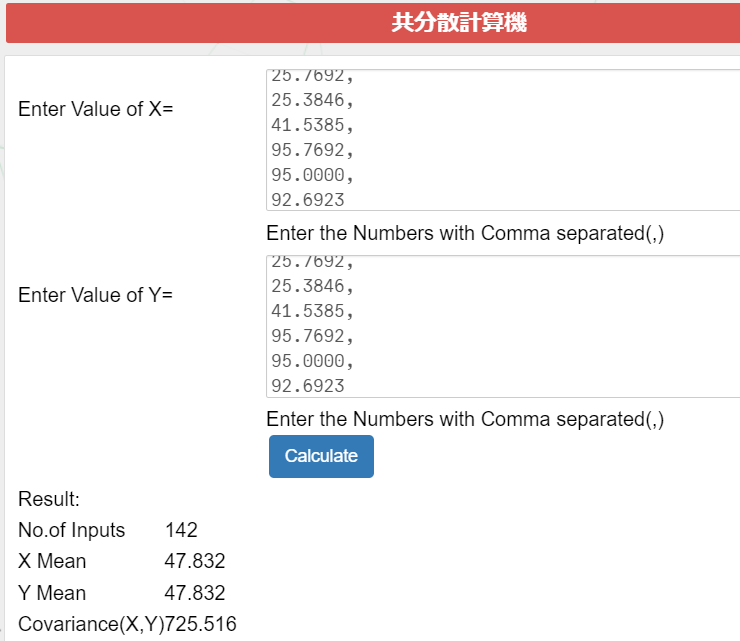

$s_{xy} \approx -29.114$

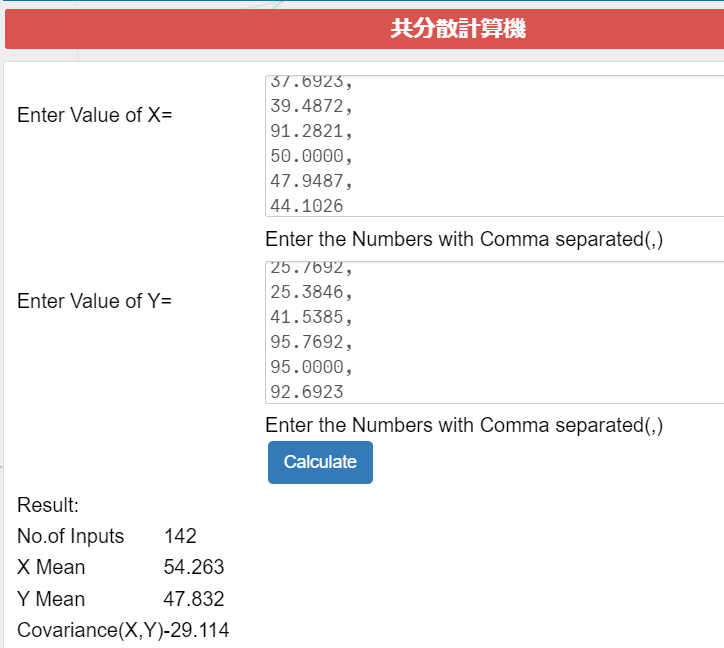

(2) 散布図は[keisan.casio.jpでの散布図の描画](https://keisan.casio.jp/exec/system/1412059302)で描ける.  データの入力は

* [x座標のみ](https://github.com/genkuroki/Statistics/blob/master/2022/data/Datasaurus_X.txt), [y座標のみ](https://github.com/genkuroki/Statistics/blob/master/2022/data/Datasaurus_Y.txt)

からx座標とy座標を別々にコピー＆ペーストすればよい.

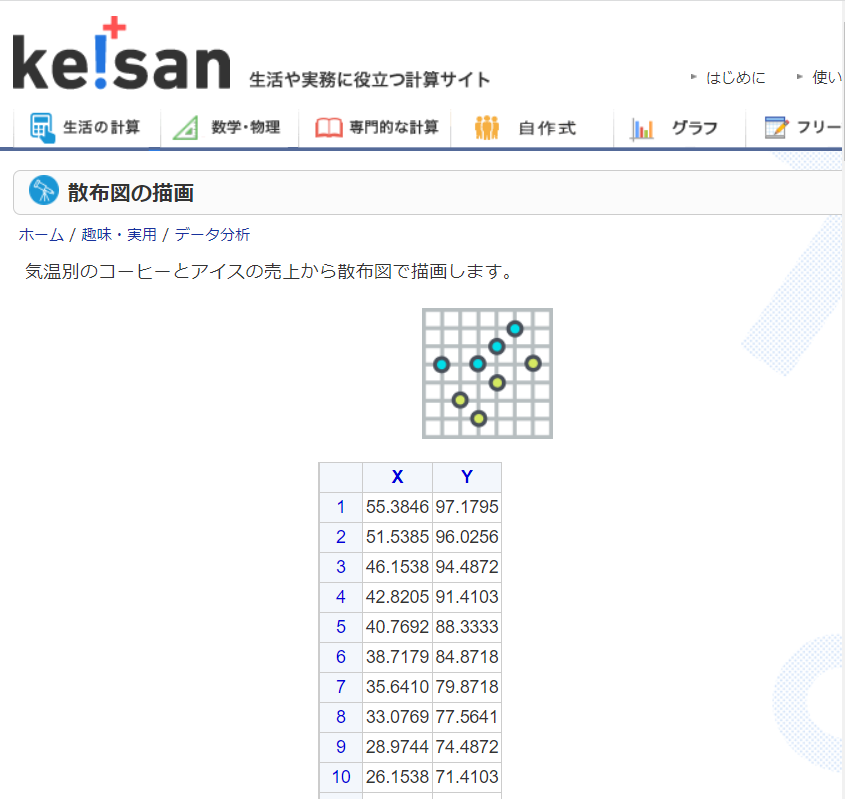

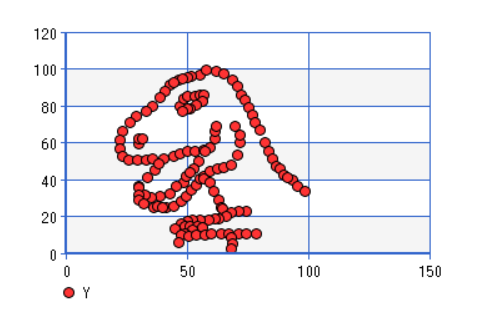